# EDA

In [1]:
# !pip install librosa

In [2]:
import librosa
import librosa.display as test
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import numpy as np

In [3]:
filename='Sound/vol.wav'
data,sr=librosa.load(filename)

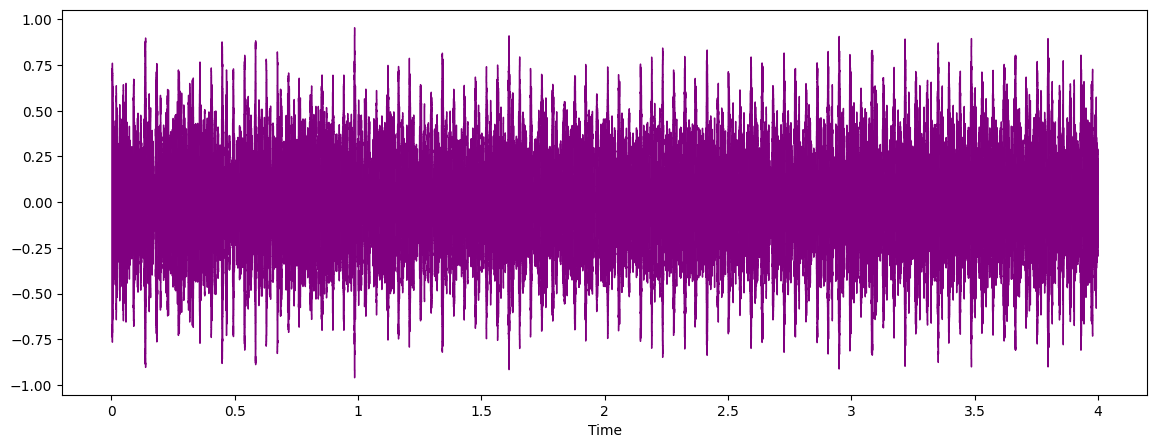

In [4]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(data,sr=sr,color='purple')
# pd.Series(data).plot(figsize=(10,5))
ipd.Audio(filename)

In [5]:
sr

22050

In [6]:
# View from Scipy

In [7]:
from scipy.io import wavfile as wav

In [8]:
sm_rate,audio=wav.read(filename)

In [9]:
sm_rate

44100

# Preprocessing

In [10]:
audio_path='Sound/'
metadata=pd.read_csv('Sound/UrbanSound8K.csv')
metadata.sample(5)

slice_file_name    fsID       start         end  salience  fold  \
2924  162134-7-13-3.wav  162134  233.210919  237.210919         1    10   
5467   205874-4-9-0.wav  205874   20.612721   21.636955         1     5   
638   111386-5-1-11.wav  111386   34.390258   38.390258         1     6   
1197   128160-5-0-8.wav  128160    4.000000    8.000000         1     4   
2691  159747-8-0-19.wav  159747   11.783772   15.783772         2     2   

      classID          class  
2924        7     jackhammer  
5467        4       drilling  
638         5  engine_idling  
1197        5  engine_idling  
2691        8          siren

In [11]:
## check whether dataset is imbalance
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [12]:
def features(file):
    audio,sr=librosa.load(file,res_type='kaiser_fast')
    mfcc_features=librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=40)
    mfcc_scaled=np.mean(mfcc_features.T,axis=0)
    return mfcc_scaled

In [13]:
from tqdm import tqdm 

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_path)+str('\\fold')+str(row["fold"])+str("\\")+str(row['slice_file_name']))
    label=row['class']
    print(file_name)
    feat=features(file_name)
    extracted_features.append([feat,label])
    

0it [00:00, ?it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100032-3-0-0.wav


3it [00:01,  3.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100263-2-0-117.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100263-2-0-121.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100263-2-0-126.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100263-2-0-137.wav


7it [00:01,  8.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100263-2-0-143.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100263-2-0-161.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100263-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100263-2-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\100648-1-0-0.wav


15it [00:01, 18.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\100648-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\100648-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\100648-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\100648-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\100652-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\100652-3-0-1.wav


18it [00:01, 18.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\100652-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\100652-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\100795-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\100795-3-1-0.wav


21it [00:01, 18.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\100795-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\100795-3-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-1.wav


27it [00:02, 18.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-13.wav


30it [00:02, 18.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-17.wav


34it [00:02, 18.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-20.wav


38it [00:02, 18.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-24.wav


42it [00:03, 17.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-28.wav


46it [00:03, 18.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-4.wav


50it [00:03, 17.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-8.wav


54it [00:03, 17.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\100852-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\101281-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\101281-3-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\101281-3-0-5.wav


58it [00:03, 18.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\101382-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\101382-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\101382-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\101382-2-0-21.wav


63it [00:04, 19.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\101382-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\101382-2-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\101382-2-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\101382-2-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\101415-3-0-2.wav


68it [00:04, 19.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\101415-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\101415-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-12.wav


72it [00:04, 19.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-17.wav


76it [00:04, 18.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-22.wav


80it [00:05, 18.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-28.wav


84it [00:05, 18.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-33.wav


88it [00:05, 18.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-39.wav


94it [00:05, 18.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\101729-0-0-9.wav


96it [00:05, 18.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\101848-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\101848-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\101848-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\101848-9-0-3.wav


104it [00:06, 24.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\101848-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\101848-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\102102-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102103-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102103-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102104-3-0-0.wav


107it [00:06, 24.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\102105-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\102106-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\102305-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\102547-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\102547-3-0-7.wav


110it [00:06, 23.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\102547-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\102842-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\102842-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\102842-3-1-5.wav


116it [00:06, 17.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\102842-3-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\102853-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\102853-8-0-1.wav


118it [00:07, 16.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\102853-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\102853-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\102853-8-0-4.wav


122it [00:07, 16.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\102853-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\102853-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\102853-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-0.wav


126it [00:07, 17.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-13.wav


130it [00:07, 17.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-17.wav


134it [00:08, 17.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-20.wav


138it [00:08, 17.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-24.wav


142it [00:08, 17.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-28.wav


146it [00:08, 17.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-4.wav


150it [00:08, 17.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-8.wav


154it [00:09, 17.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\102857-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102858-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102858-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-0.wav


158it [00:09, 17.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-12.wav


162it [00:09, 18.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-2.wav


166it [00:09, 18.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-6.wav


172it [00:10, 18.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\102871-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-0-0.wav


174it [00:10, 18.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-1-1.wav


178it [00:10, 19.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-1-5.wav


184it [00:10, 20.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-3-1.wav


187it [00:10, 18.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-3-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-4-0.wav


189it [00:11, 17.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-4-4.wav


193it [00:11, 16.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-4-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103074-7-4-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\103076-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\103076-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\103076-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-0-0.wav


200it [00:11, 18.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-0-5.wav


203it [00:11, 19.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-10.wav


207it [00:12, 18.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-4.wav


211it [00:12, 18.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-8.wav


215it [00:12, 18.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-2-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103199-4-7-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-0.wav


220it [00:12, 18.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-12.wav


224it [00:12, 17.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-16.wav


228it [00:13, 16.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-19.wav


232it [00:13, 16.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-5.wav


234it [00:13, 13.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-8.wav


236it [00:13, 13.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\103249-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-0.wav


240it [00:14, 10.79it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-11.wav


242it [00:14,  9.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-13.wav


244it [00:14,  9.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-16.wav


248it [00:15, 11.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-2.wav


252it [00:15, 13.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-6.wav


256it [00:15, 13.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\103258-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103357-4-0-0.wav


260it [00:15, 15.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\103357-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\103438-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\103438-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\103438-5-0-2.wav


264it [00:16, 16.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\104327-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\104327-2-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\104327-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\104327-2-0-28.wav


268it [00:16, 17.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\104327-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\104327-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\104327-2-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\104327-2-0-4.wav


272it [00:16, 17.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104421-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104421-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104421-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104421-2-0-29.wav


276it [00:16, 18.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104421-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104421-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104421-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104421-2-1-3.wav


280it [00:16, 15.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-27.wav


282it [00:17, 13.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-35.wav


286it [00:17, 12.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-45.wav


288it [00:17, 12.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-52.wav


290it [00:17, 12.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-55.wav


294it [00:18, 10.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-0-66.wav


296it [00:18, 10.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-1-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\104625-4-1-8.wav


298it [00:18, 12.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-11.wav


303it [00:18, 15.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-5.wav


305it [00:18, 16.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-8.wav


309it [00:19, 16.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\104817-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-10-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-10-10.wav


313it [00:19, 17.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-10-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-10-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-10-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-10-9.wav


317it [00:19, 18.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-11-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-12-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-14-1.wav


321it [00:19, 18.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-14-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-14-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-15-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-15-3.wav


325it [00:20, 18.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-15-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-15-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-16-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-16-10.wav


329it [00:20, 18.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-16-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-16-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-16-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-16-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-17-0.wav


335it [00:20, 20.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-17-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-17-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-17-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-17-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-17-7.wav


341it [00:20, 21.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-17-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-18-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-18-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-18-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-18-9.wav


344it [00:20, 21.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-19-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-19-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-19-6.wav


347it [00:21, 16.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-19-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-19-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-19-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-2-4.wav


350it [00:21, 17.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-7-0.wav


356it [00:21, 19.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-7-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-7-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-7-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-7-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-8-13.wav


362it [00:21, 20.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-8-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-8-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-8-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-8-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-8-6.wav


365it [00:22, 20.65it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-8-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-9-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\104998-7-9-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-0-0.wav


371it [00:22, 21.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-0-5.wav


374it [00:22, 21.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-10.wav


380it [00:22, 20.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-3.wav


386it [00:23, 21.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-7.wav


389it [00:23, 20.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-10.wav


392it [00:23, 20.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-14.wav


398it [00:23, 19.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-4.wav


404it [00:23, 20.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-8.wav


407it [00:24, 20.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-2-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-3-3.wav


410it [00:24, 20.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-3-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-3-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-3-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-3-7.wav


416it [00:24, 20.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105029-7-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105088-3-0-10.wav


422it [00:24, 20.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105088-3-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105088-3-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\105088-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-0-0.wav


425it [00:24, 20.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-0-4.wav


428it [00:25, 20.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-1-3.wav


434it [00:25, 20.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-2-3.wav


440it [00:25, 20.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\105289-8-2-7.wav


443it [00:25, 19.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\105319-3-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\105319-3-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\105319-3-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\105415-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\105415-2-0-15.wav


448it [00:26, 19.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\105415-2-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\105415-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\105415-2-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\105415-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\105415-2-0-6.wav


451it [00:26, 19.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\105415-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\105425-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\105425-9-0-10.wav


455it [00:26, 18.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\105425-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\105425-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\105425-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\105425-9-0-23.wav


460it [00:26, 19.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\106014-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\106014-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\106014-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\106014-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\106014-5-0-4.wav


466it [00:27, 21.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-11.wav


469it [00:27, 20.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-16.wav


472it [00:27, 21.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-19.wav


477it [00:27, 16.03it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-4.wav


480it [00:27, 17.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-8.wav


486it [00:28, 18.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\106015-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\106486-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\106486-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\106486-5-0-2.wav


490it [00:28, 18.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\106487-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\106487-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\106487-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\106905-5-0-0.wav


492it [00:28, 18.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\106905-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\106905-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\106905-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\106905-8-0-1.wav


497it [00:28, 20.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\106905-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\106905-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\106955-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\107090-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\107090-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\107190-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\107228-5-0-0.wav


504it [00:28, 24.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\107228-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\107228-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\107228-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\107228-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\107228-5-0-5.wav


510it [00:29, 22.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\107228-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\107228-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-0-1.wav


513it [00:29, 21.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-0-6.wav


516it [00:29, 20.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-1.wav


522it [00:29, 20.02it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-13.wav


525it [00:30, 19.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-17.wav


530it [00:30, 20.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-5.wav


536it [00:30, 21.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\107357-8-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\107653-9-0-12.wav


539it [00:30, 21.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\107653-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\107653-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\107653-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\107653-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\107653-9-0-7.wav


545it [00:30, 21.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\107842-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\107842-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\107842-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\107842-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\107842-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\107842-4-2-1.wav


551it [00:31, 22.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\107842-4-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\107842-4-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\107842-4-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\107842-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108041-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108041-9-0-2.wav


557it [00:31, 23.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108041-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108041-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108041-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108041-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108041-9-0-9.wav


564it [00:31, 27.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\108187-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\108187-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\108187-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\108187-3-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\108357-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\108357-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\108357-9-0-27.wav


570it [00:31, 24.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\108357-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\108357-9-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\108357-9-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108362-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108362-2-0-12.wav


573it [00:32, 23.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108362-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108362-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108362-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108362-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108362-2-0-7.wav


579it [00:32, 22.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\108362-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\108638-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\108638-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\108638-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\108638-9-0-4.wav


585it [00:32, 22.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\108638-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\108638-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\109233-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\109233-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\109233-3-0-5.wav


591it [00:32, 23.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\109233-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\109263-9-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\109263-9-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\109263-9-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\109263-9-0-61.wav


594it [00:33, 22.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\109263-9-0-78.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\109703-2-0-134.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\109703-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\109703-2-0-153.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\109703-2-0-29.wav


600it [00:33, 22.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\109703-2-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\109703-2-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\109703-2-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\109711-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\109711-3-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\109711-3-2-6.wav


606it [00:33, 22.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\110134-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\110371-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\110371-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\110371-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\110389-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\110621-7-0-0.wav


612it [00:33, 24.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\110621-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\110621-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\110621-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\110622-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\110688-3-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\110688-3-0-17.wav


615it [00:33, 23.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\110688-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\110688-3-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\110868-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\110868-9-0-13.wav


621it [00:34, 21.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\110868-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\110868-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\110868-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\110868-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\110918-3-0-1.wav


627it [00:34, 22.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\110918-3-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\110918-3-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\110918-3-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111048-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-0-0.wav


630it [00:34, 21.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-0-5.wav


636it [00:34, 20.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-10.wav


639it [00:35, 20.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-14.wav


645it [00:35, 20.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-6.wav


651it [00:35, 20.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\111386-5-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-0.wav


654it [00:35, 20.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-13.wav


657it [00:35, 20.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-17.wav


662it [00:36, 18.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-20.wav


667it [00:36, 18.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-4.wav


671it [00:36, 18.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-8.wav


675it [00:36, 17.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\111671-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\112075-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\112075-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\112075-5-0-2.wav


677it [00:37, 18.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\112195-3-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\112195-3-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\112195-3-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\112195-3-0-80.wav


682it [00:37, 18.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\113160-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\113201-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\113201-5-0-1.wav


684it [00:37, 15.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\113201-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\113201-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\113201-5-0-4.wav


688it [00:37, 13.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\113201-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\113201-5-0-6.wav


690it [00:38, 12.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\113201-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-0.wav


692it [00:38, 11.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-10.wav


694it [00:38, 11.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-13.wav


696it [00:38, 11.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-16.wav


700it [00:38, 11.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-19.wav


702it [00:39, 11.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-21.wav


706it [00:39, 11.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-24.wav


708it [00:39, 11.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-27.wav


712it [00:39, 12.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-4.wav


714it [00:40, 12.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-7.wav


718it [00:40, 12.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113202-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-0-0.wav


720it [00:40, 12.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-0-3.wav


724it [00:40, 12.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-0-6.wav


726it [00:41, 13.02it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-1-0.wav


730it [00:41, 12.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-2-0.wav


732it [00:41, 12.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-4-0.wav


736it [00:41, 12.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113203-5-8-0.wav


739it [00:41, 15.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-1-1.wav


743it [00:42, 14.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-1-4.wav


745it [00:42, 13.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-1-7.wav


749it [00:42, 13.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\113205-5-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113216-5-0-0.wav


751it [00:42, 13.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113216-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113216-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113216-5-0-3.wav


755it [00:43, 13.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\113216-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\113601-9-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\113601-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\113601-9-0-33.wav


761it [00:43, 18.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\113601-9-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\113601-9-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\113601-9-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\113785-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\113785-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\114280-3-0-0.wav


765it [00:43, 21.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\114280-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\114587-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\114587-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\114587-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\114587-3-0-7.wav


771it [00:43, 20.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\115239-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\115239-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\115239-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\115239-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\115239-9-0-4.wav


777it [00:44, 20.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\115239-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\115240-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\115240-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\115240-9-0-28.wav


780it [00:44, 20.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\115240-9-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\115240-9-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\115240-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115241-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115241-9-0-14.wav


783it [00:44, 20.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115241-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115241-9-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115241-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115241-9-0-8.wav


789it [00:44, 20.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115241-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\115242-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\115242-9-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\115242-9-0-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\115242-9-0-68.wav


792it [00:44, 20.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\115242-9-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\115242-9-0-83.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\115243-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\115243-9-0-16.wav


798it [00:45, 20.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\115243-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\115243-9-0-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\115243-9-0-81.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\115243-9-0-94.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\115411-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\115411-3-2-0.wav


804it [00:45, 21.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\115411-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\115415-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\115415-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\115415-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\115415-9-0-5.wav


807it [00:45, 20.65it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\115415-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\115415-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115418-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115418-9-0-12.wav


813it [00:45, 20.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115418-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115418-9-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115418-9-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\115418-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\115535-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\115536-3-0-0.wav


821it [00:46, 26.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\115537-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\116163-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\116163-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\116163-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\116400-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\116400-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\116400-3-1-1.wav


824it [00:46, 23.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\116400-3-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\116423-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\116423-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\116423-2-0-2.wav


830it [00:46, 20.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\116423-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\116423-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\116483-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\116483-3-0-2.wav


833it [00:46, 19.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\116483-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\116483-3-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\116484-3-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\116484-3-0-16.wav


836it [00:47, 19.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\116484-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\116484-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\116485-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\116485-3-0-6.wav


842it [00:47, 20.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\116485-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\116485-3-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\117048-3-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\117048-3-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\117048-3-0-25.wav


848it [00:47, 20.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\117048-3-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\117072-3-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\117072-3-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\117072-3-0-19.wav


851it [00:47, 20.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\117072-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-11.wav


857it [00:48, 20.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-4.wav


860it [00:48, 20.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\117181-8-0-9.wav


866it [00:48, 22.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\11722-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\11722-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\117271-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\117271-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\117271-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\117271-3-0-3.wav


872it [00:48, 22.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\117536-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\117889-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\117889-9-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\117889-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\117889-9-0-36.wav


875it [00:48, 22.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\117889-9-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\117889-9-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\118070-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\118072-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118101-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118101-3-0-3.wav


882it [00:49, 22.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118101-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118101-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-1.wav


885it [00:49, 21.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-2.wav


891it [00:49, 21.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-7.wav


894it [00:49, 20.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118278-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-1.wav


900it [00:50, 20.16it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-14.wav


905it [00:50, 19.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-5.wav


908it [00:50, 20.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118279-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\118440-4-0-0.wav


916it [00:50, 28.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\118440-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\118440-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\118440-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\118440-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\118440-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\118440-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\118440-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\118440-4-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\118496-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\118496-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118558-5-0-0.wav


926it [00:50, 30.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118558-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118558-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118558-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118558-5-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118558-5-1-2.wav


930it [00:51, 27.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118558-5-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118558-5-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118558-5-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\118558-5-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\118587-3-0-2.wav


936it [00:51, 27.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\118587-3-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\118587-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\118723-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\118961-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\118962-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\118963-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\118964-3-0-0.wav


943it [00:51, 27.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\119067-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\119067-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\119067-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119420-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119420-3-1-0.wav


946it [00:51, 26.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119449-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119449-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119449-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119449-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119449-5-0-4.wav


952it [00:51, 24.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119449-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119449-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\119455-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\119455-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\119455-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\119455-5-0-3.wav


958it [00:52, 23.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\119455-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\119455-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\119455-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\119455-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119809-7-0-0.wav


961it [00:52, 22.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119809-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119809-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119809-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119809-7-0-4.wav


967it [00:52, 22.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119809-7-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\119809-7-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\121285-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\121285-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\121285-0-0-2.wav


973it [00:52, 22.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\121285-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\121285-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\121285-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\121285-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\121285-0-0-7.wav


976it [00:53, 22.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\121285-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\121285-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-10.wav


982it [00:53, 21.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-15.wav


985it [00:53, 21.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-5.wav


991it [00:53, 21.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121286-0-0-9.wav


997it [00:53, 23.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\121299-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\121528-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\121528-8-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\121888-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\122199-3-1-1.wav


1000it [00:54, 22.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\122199-3-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\122199-3-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\122199-3-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\122690-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\122738-9-0-11.wav


1006it [00:54, 22.16it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\122738-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\122738-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\122738-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\122738-9-0-5.wav


1009it [00:54, 21.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\122738-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\123399-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\123399-2-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\123399-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\123399-2-0-5.wav


1012it [00:54, 21.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\123399-2-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\123399-2-0-74.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\123399-2-0-83.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\123399-2-0-91.wav


1018it [00:54, 20.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\123685-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\123685-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\123685-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\123685-5-0-3.wav


1021it [00:55, 20.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\123685-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\123685-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\123685-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\123685-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\123685-5-0-8.wav


1027it [00:55, 20.79it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-11.wav


1030it [00:55, 20.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-15.wav


1033it [00:55, 20.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-2.wav


1039it [00:56, 20.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-7.wav


1042it [00:56, 19.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-1-1.wav


1047it [00:56, 19.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-1-5.wav


1052it [00:56, 19.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-2-3.wav


1056it [00:56, 19.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\123688-8-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-11.wav


1061it [00:57, 19.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-15.wav


1065it [00:57, 19.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-3.wav


1070it [00:57, 19.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-8.wav


1073it [00:57, 20.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\124389-8-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\124489-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\124489-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\124489-9-0-16.wav


1078it [00:58, 18.65it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\124489-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\124489-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\124489-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125520-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125520-1-1-0.wav


1086it [00:58, 26.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125520-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125520-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125520-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\125523-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\125523-3-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\125523-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\125554-3-0-0.wav


1089it [00:58, 26.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\125574-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-0-2.wav


1095it [00:58, 21.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-0-6.wav


1098it [00:58, 21.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-1-0.wav


1104it [00:59, 20.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-1-4.wav


1107it [00:59, 20.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-2-0.wav


1113it [00:59, 20.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-2-4.wav


1116it [00:59, 19.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-2-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-2-8.wav


1119it [00:59, 19.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-3-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-3-4.wav


1125it [01:00, 19.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-3-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-3-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-3-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-4-0.wav


1128it [01:00, 19.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-4-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-4-5.wav


1134it [01:00, 20.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-4-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-4-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\125678-7-4-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\125791-3-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\125791-3-0-13.wav


1137it [01:00, 20.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\125791-3-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\125791-3-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\126153-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\126153-9-0-1.wav


1143it [01:01, 21.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\126153-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\126153-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\126153-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\126153-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\126153-9-0-8.wav


1150it [01:01, 24.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\12647-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\12647-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\12647-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\12647-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\126521-3-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\126521-3-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\126521-3-0-18.wav


1153it [01:01, 23.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\126521-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-10.wav


1159it [01:01, 22.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-4.wav


1165it [01:02, 22.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-8.wav


1168it [01:02, 22.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\127443-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\127538-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\127538-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\127538-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\127872-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\127873-0-0-0.wav


1176it [01:02, 27.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\128030-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\128030-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\128030-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\12812-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\12812-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\12812-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\128152-9-0-10.wav


1182it [01:02, 24.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\128152-9-0-126.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\128152-9-0-167.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\128152-9-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\128152-9-0-49.wav


1185it [01:02, 23.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\128152-9-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-11.wav


1191it [01:03, 23.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-2.wav


1194it [01:03, 22.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-7.wav


1200it [01:03, 21.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128160-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\128240-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\128240-3-0-20.wav


1203it [01:03, 17.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\128240-3-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\128240-3-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128465-1-0-0.wav


1206it [01:03, 18.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128465-1-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128465-1-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128465-1-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128465-1-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128465-1-0-5.wav


1212it [01:04, 19.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128465-1-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128465-1-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128465-1-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\128470-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\128470-3-0-1.wav


1215it [01:04, 20.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\128470-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\128470-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128607-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128607-4-0-1.wav


1220it [01:04, 16.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128607-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128607-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128607-4-0-4.wav


1222it [01:04, 14.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128607-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128607-4-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128607-4-1-2.wav


1226it [01:05, 14.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\128607-4-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128891-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128891-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\128891-3-0-5.wav


1229it [01:05, 15.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\129356-2-0-101.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\129356-2-0-115.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\129356-2-0-118.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\129356-2-0-129.wav


1235it [01:05, 17.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\129356-2-0-199.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\129356-2-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\129356-2-0-98.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\129750-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\129750-2-0-34.wav


1240it [01:05, 18.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\129750-2-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\129750-2-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\129750-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\129750-2-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\129750-2-0-46.wav


1243it [01:06, 19.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\129750-2-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\130030-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-1-1.wav


1248it [01:06, 19.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-2-1.wav


1254it [01:06, 19.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-3-2.wav


1256it [01:06, 19.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-5-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-5-2.wav


1260it [01:06, 18.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-5-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-5-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\130961-4-5-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\131199-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\131428-9-0-3.wav


1266it [01:07, 20.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\131428-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\131428-9-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\131428-9-1-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\131428-9-1-8.wav


1269it [01:07, 20.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\131428-9-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\131571-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\131918-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\131918-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\131918-7-0-2.wav


1275it [01:07, 21.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\131918-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\131918-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\131918-7-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\131918-7-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\131918-7-0-7.wav


1278it [01:07, 21.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\131918-7-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132016-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132016-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132016-7-0-2.wav


1284it [01:08, 20.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132016-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132016-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132016-7-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132016-7-0-6.wav


1287it [01:08, 19.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132016-7-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132016-7-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\132016-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\132016-9-0-11.wav


1292it [01:08, 19.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\132016-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\132016-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\132016-9-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\132016-9-0-6.wav


1295it [01:08, 20.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-12.wav


1301it [01:08, 20.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-6.wav


1304it [01:09, 20.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132021-7-1-0.wav


1312it [01:09, 25.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\132073-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\132073-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\132073-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\132073-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\132073-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\132073-1-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\132073-1-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132108-9-0-12.wav


1318it [01:09, 24.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132108-9-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132108-9-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132108-9-1-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132108-9-1-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\132108-9-1-27.wav


1321it [01:09, 23.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132162-9-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132162-9-1-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132162-9-1-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132162-9-1-67.wav


1327it [01:09, 21.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132162-9-1-68.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\132162-9-1-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-10.wav


1330it [01:10, 20.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-16.wav


1336it [01:10, 20.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-22.wav


1339it [01:10, 20.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-26.wav


1345it [01:10, 21.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-6.wav


1351it [01:11, 21.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\13230-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\132855-2-0-113.wav


1354it [01:11, 21.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\132855-2-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\132855-2-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\132855-2-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\132855-2-0-77.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\132855-2-0-88.wav


1357it [01:11, 20.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\132855-2-0-90.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\132855-2-0-99.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133090-2-0-14.wav


1362it [01:11, 17.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133090-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133090-2-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133090-2-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133090-2-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133090-2-0-64.wav


1366it [01:11, 18.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133090-2-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133090-2-0-76.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133473-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133473-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133473-8-0-2.wav


1372it [01:12, 19.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133473-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133473-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\133473-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133494-2-0-18.wav


1374it [01:12, 16.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133494-2-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133494-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133494-2-0-25.wav


1378it [01:12, 13.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133494-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133494-2-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133494-2-0-37.wav


1380it [01:12, 13.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133494-2-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133797-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133797-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\133797-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-0.wav


1387it [01:13, 19.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-15.wav


1393it [01:13, 20.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-2.wav


1396it [01:13, 21.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-24.wav


1402it [01:13, 20.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-28.wav


1405it [01:14, 20.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-8.wav


1408it [01:14, 20.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\134717-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-11.wav


1416it [01:14, 26.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135160-8-0-9.wav


1424it [01:14, 29.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-2-0.wav


1432it [01:14, 30.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\135526-6-9-0.wav


1440it [01:15, 32.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-0.wav


1444it [01:15, 27.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-4.wav


1450it [01:15, 24.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-8.wav


1456it [01:15, 26.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-14-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-6-0.wav


1462it [01:16, 27.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135527-6-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-10-0.wav


1465it [01:16, 26.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-4-0.wav


1471it [01:16, 25.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-8-0.wav


1478it [01:16, 28.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\135528-6-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-14-0.wav


1487it [01:16, 33.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-15-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-16-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-17-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-18-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-19-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-4-0.wav


1495it [01:17, 33.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\135544-6-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\13577-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\13577-3-0-2.wav


1499it [01:17, 28.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\13577-3-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\135776-2-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\135776-2-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\135776-2-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\135776-2-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\135776-2-0-50.wav


1505it [01:17, 24.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\135776-2-0-65.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\135776-2-0-85.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\135776-2-0-90.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\13579-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\13579-2-0-16.wav


1508it [01:17, 22.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\13579-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\13579-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\13579-2-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\13579-2-0-48.wav


1514it [01:18, 23.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\13579-2-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\13579-2-0-62.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\135849-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\136399-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\136399-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\136399-6-2-0.wav


1520it [01:18, 23.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\136399-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\136399-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\136399-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\136399-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\136399-6-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\136399-6-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\136399-6-9-0.wav


1527it [01:18, 24.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\136558-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\136558-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\136558-9-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\136558-9-1-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\136558-9-1-26.wav


1530it [01:18, 22.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\136558-9-1-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\137156-9-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\137156-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\137156-9-0-31.wav


1536it [01:19, 20.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\137156-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\137156-9-0-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\137156-9-0-79.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137803-3-0-0.wav


1539it [01:19, 17.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137803-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137803-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-1.wav


1543it [01:19, 18.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-4.wav


1548it [01:19, 18.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\137815-4-0-9.wav


1553it [01:19, 19.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\137969-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\137969-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\137969-2-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\137969-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\137969-2-0-41.wav


1559it [01:20, 20.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\137969-2-0-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\137969-2-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\137971-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\137971-2-0-2.wav


1562it [01:20, 20.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\137971-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\137971-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\137971-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\137971-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\137971-2-0-8.wav


1568it [01:20, 20.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138015-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138015-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138015-3-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\138017-9-0-2.wav


1571it [01:20, 21.03it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\138017-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\138017-9-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\138017-9-1-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\138017-9-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\138017-9-1-6.wav


1577it [01:21, 21.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138031-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138031-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138031-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138031-2-0-23.wav


1580it [01:21, 21.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138031-2-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138031-2-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138031-2-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\138031-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\138465-1-0-0.wav


1586it [01:21, 22.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\138468-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\138473-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\138473-9-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\138473-9-0-35.wav


1589it [01:21, 21.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\138473-9-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\138473-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\138473-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\139000-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\139000-4-0-1.wav


1592it [01:21, 21.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\139000-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\139665-9-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\139665-9-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\139665-9-0-25.wav


1598it [01:22, 21.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\139665-9-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\139665-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\139665-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\139948-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\139948-3-1-0.wav


1604it [01:22, 23.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\139948-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\139948-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\139951-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\139951-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\139951-9-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\139951-9-0-33.wav


1610it [01:22, 23.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\139951-9-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\139951-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\140824-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\14110-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\14110-4-0-1.wav


1613it [01:22, 22.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\14110-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14111-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14111-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14111-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14111-4-0-3.wav


1619it [01:22, 22.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14111-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14111-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14111-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14111-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\14113-4-0-0.wav


1625it [01:23, 21.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\14113-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\14114-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\14114-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\14114-4-0-2.wav


1628it [01:23, 23.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\14114-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\14115-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\141240-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\141240-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\142003-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\142003-2-0-1.wav


1634it [01:23, 22.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\142003-2-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\142003-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\142003-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\142003-2-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\142003-2-0-30.wav


1643it [01:23, 30.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\142003-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\142641-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\143115-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\143115-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\143115-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\143115-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\143115-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\14358-3-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\14358-3-0-7.wav


1647it [01:24, 26.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\14358-3-0-85.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\14358-3-0-90.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\143604-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\143651-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\143651-2-0-16.wav


1653it [01:24, 23.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\143651-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\143651-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\143651-2-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\143651-2-0-55.wav


1656it [01:24, 22.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\143651-2-0-59.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\143651-2-0-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14385-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14385-9-0-11.wav


1659it [01:24, 21.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14385-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14385-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14385-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14385-9-0-21.wav


1665it [01:24, 20.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\14386-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\14386-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\14386-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\14386-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\14386-9-0-20.wav


1668it [01:25, 20.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\14386-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\14387-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\14387-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\14387-9-0-15.wav


1674it [01:25, 20.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\14387-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\14387-9-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\14387-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\143970-5-0-0.wav


1677it [01:25, 20.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\143970-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\143970-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\143970-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-1.wav


1683it [01:25, 19.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-13.wav


1686it [01:25, 20.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-18.wav


1692it [01:26, 19.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-21.wav


1694it [01:26, 19.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-6.wav


1699it [01:26, 18.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-0.wav


1703it [01:26, 18.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-2.wav


1707it [01:27, 17.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-6.wav


1711it [01:27, 17.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144007-5-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\144028-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\144028-3-1-0.wav


1717it [01:27, 20.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\144028-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-11.wav


1722it [01:27, 19.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-16.wav


1728it [01:28, 20.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-3.wav


1731it [01:28, 20.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-8.wav


1734it [01:28, 20.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-3-0.wav


1740it [01:28, 20.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-4-4.wav


1746it [01:29, 20.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-4-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-4-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-4-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-4-8.wav


1749it [01:29, 20.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-5-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144068-5-5-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-0-0.wav


1752it [01:29, 17.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-1-1.wav


1754it [01:29, 16.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-2-4.wav


1758it [01:29, 14.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-1.wav


1760it [01:30, 14.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-12.wav


1764it [01:30, 13.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-2.wav


1766it [01:30, 13.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-5.wav


1770it [01:30, 14.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\144351-4-3-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14468-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14468-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14468-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14468-3-5-0.wav


1776it [01:31, 18.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14470-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14470-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14470-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14470-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14470-2-0-56.wav


1782it [01:31, 21.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14470-2-0-65.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14470-2-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\14470-2-0-72.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\144885-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\145206-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\145206-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\145206-6-2-0.wav


1791it [01:31, 28.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\145206-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\145206-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\145206-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14524-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14527-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14527-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14527-9-0-3.wav


1794it [01:31, 26.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14527-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14527-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14527-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\14527-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145390-9-0-13.wav


1800it [01:31, 24.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145390-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145390-9-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145390-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145390-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145390-9-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145390-9-0-7.wav


1807it [01:32, 28.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\145577-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\145608-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\145608-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\145608-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\145608-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\145609-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\145609-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\145611-6-0-0.wav


1815it [01:32, 29.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\145611-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\145611-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\145611-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\145611-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\145612-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\145612-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\145612-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\145612-6-3-0.wav


1823it [01:32, 32.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145683-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145683-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145683-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145683-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145683-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\145683-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-0.wav


1827it [01:32, 31.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-13.wav


1834it [01:33, 26.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-6.wav


1840it [01:33, 24.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\146186-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\146244-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\146249-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\146343-3-0-0.wav


1846it [01:33, 24.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-100.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-112.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-115.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-116.wav


1849it [01:33, 22.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-117.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-125.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-137.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-140.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-151.wav


1852it [01:33, 21.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-154.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-155.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-165.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-17.wav


1858it [01:34, 20.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-38.wav


1861it [01:34, 20.03it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-64.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-80.wav


1867it [01:34, 19.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-86.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-87.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\146690-0-0-93.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-1.wav


1871it [01:34, 19.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-19.wav


1876it [01:35, 19.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-3.wav


1879it [01:35, 19.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-37.wav


1885it [01:35, 20.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-59.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-63.wav


1888it [01:35, 20.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-65.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-66.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-68.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\146709-0-0-7.wav


1894it [01:36, 20.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-18.wav


1897it [01:36, 20.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-27.wav


1903it [01:36, 19.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-38.wav


1905it [01:36, 19.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-47.wav


1910it [01:36, 19.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-55.wav


1915it [01:37, 19.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\146714-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-0.wav


1917it [01:37, 18.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-12.wav


1922it [01:37, 19.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-17.wav


1928it [01:37, 20.19it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-21.wav


1933it [01:38, 19.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-27.wav


1939it [01:38, 21.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-33.wav


1942it [01:38, 20.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-6.wav


1948it [01:38, 20.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\146845-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\147019-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\147317-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\147491-9-0-0.wav


1954it [01:39, 21.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\147491-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\147491-9-2-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\147491-9-2-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\147491-9-2-32.wav


1959it [01:39, 27.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\147491-9-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147672-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147672-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147672-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14772-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14772-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14772-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14772-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14772-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14772-7-5-0.wav


1968it [01:39, 31.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14772-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14772-7-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14772-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\14772-7-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-2-0.wav


1972it [01:39, 32.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-5-0.wav


1980it [01:39, 28.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\147764-4-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\14780-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\14780-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\14780-9-0-2.wav


1986it [01:40, 24.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-16.wav


1989it [01:40, 22.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-27.wav


1992it [01:40, 21.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-36.wav


1998it [01:40, 20.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-41.wav


2001it [01:40, 20.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-50.wav


2007it [01:41, 21.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-52.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\147926-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\148166-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-2-0.wav


2010it [01:41, 21.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-10.wav


2016it [01:41, 21.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-6.wav


2019it [01:41, 21.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148463-7-3-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-0.wav


2025it [01:42, 19.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-12.wav


2028it [01:42, 19.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-17.wav


2034it [01:42, 20.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-5.wav


2037it [01:42, 21.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\148632-8-0-9.wav


2045it [01:42, 27.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\148827-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\148827-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\148827-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\148827-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\148827-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\148828-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\148828-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\148833-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\148833-6-1-0.wav


2054it [01:43, 34.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\148834-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\148835-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\148835-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\148835-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\148835-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\148835-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148837-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148837-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\148837-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\148838-6-0-0.wav


2063it [01:43, 37.19it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\148838-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\148838-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\148841-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\148841-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\148841-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149177-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\149193-5-0-0.wav


2067it [01:43, 27.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\149193-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\149193-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\149193-5-0-3.wav


2071it [01:43, 17.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\149193-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\149193-5-0-5.wav


2074it [01:44, 17.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149254-9-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149254-9-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149254-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149254-9-0-42.wav


2077it [01:44, 17.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149254-9-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149254-9-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149255-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149255-9-0-13.wav


2080it [01:44, 18.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149255-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149255-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149255-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149255-9-0-7.wav


2087it [01:44, 18.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149370-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149370-9-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149370-9-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149370-9-0-22.wav


2089it [01:44, 18.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149370-9-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\149370-9-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149929-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149929-9-0-2.wav


2093it [01:45, 18.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149929-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149929-9-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149929-9-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\149929-9-1-4.wav


2099it [01:45, 22.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\150341-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\150341-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-0-3.wav


2105it [01:45, 20.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-2-0.wav


2108it [01:45, 20.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151005-4-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\151065-6-0-0.wav


2114it [01:46, 22.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\151069-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151071-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151149-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151149-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151149-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151149-2-0-22.wav


2117it [01:46, 21.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151149-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151149-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151149-2-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151149-2-0-56.wav


2126it [01:46, 27.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151359-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151359-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151359-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\151359-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151877-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\151877-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-1.wav


2129it [01:46, 24.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-13.wav


2135it [01:46, 21.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-5.wav


2138it [01:47, 20.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\151977-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\152570-9-0-0.wav


2143it [01:47, 17.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\152570-9-1-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\152570-9-1-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\152570-9-1-61.wav


2147it [01:47, 16.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\152570-9-1-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\152570-9-1-81.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\152588-3-0-0.wav


2150it [01:47, 18.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\152588-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\152588-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\152588-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-1.wav


2156it [01:48, 19.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-13.wav


2159it [01:48, 19.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-6.wav


2164it [01:48, 19.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\152908-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\153057-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\153261-0-0-0.wav


2167it [01:48, 21.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\153261-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\153261-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\153261-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\15356-2-0-0.wav


2173it [01:48, 20.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\15356-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\15356-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\15356-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\15356-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-0.wav


2176it [01:49, 20.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-12.wav


2182it [01:49, 19.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-16.wav


2185it [01:49, 19.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-20.wav


2191it [01:49, 19.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-6.wav


2197it [01:50, 20.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\154758-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155044-9-0-11.wav


2200it [01:50, 20.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155044-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155044-9-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155044-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155044-9-0-37.wav


2203it [01:50, 20.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155044-9-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155127-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155127-9-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155127-9-1-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155127-9-1-24.wav


2209it [01:50, 21.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155127-9-1-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155127-9-1-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155129-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155129-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155129-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155130-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155130-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\155202-9-0-124.wav


2217it [01:51, 24.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\155202-9-0-126.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\155202-9-0-135.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\155202-9-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\155202-9-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\155202-9-0-6.wav


2223it [01:51, 22.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155212-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155212-9-1-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155212-9-1-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155212-9-1-75.wav


2226it [01:51, 21.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155212-9-1-85.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155212-9-1-88.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\155217-9-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\155217-9-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\155217-9-0-57.wav


2229it [01:51, 21.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\155217-9-0-85.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\155217-9-1-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\155217-9-1-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155219-2-0-0.wav


2235it [01:51, 20.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155219-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155219-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155219-2-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155219-2-0-25.wav


2238it [01:52, 20.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155219-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155219-2-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155219-2-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155227-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155227-9-0-20.wav


2244it [01:52, 19.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155227-9-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155227-9-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155227-9-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155227-9-0-3.wav


2247it [01:52, 20.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\155234-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155238-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155238-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155238-2-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155238-2-0-36.wav


2253it [01:52, 20.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155238-2-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155238-2-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155238-2-0-75.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155238-2-0-97.wav


2256it [01:52, 19.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155241-9-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155241-9-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155241-9-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155241-9-0-79.wav


2261it [01:53, 19.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155241-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155241-9-0-88.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155242-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155242-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155242-9-0-27.wav


2267it [01:53, 20.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155242-9-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155242-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155242-9-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\155243-9-0-18.wav


2270it [01:53, 20.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\155243-9-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\155243-9-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\155243-9-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\155243-9-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\155243-9-0-55.wav


2273it [01:53, 20.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155262-2-0-101.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155262-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155262-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155262-2-0-2.wav


2279it [01:54, 21.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155262-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155262-2-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155262-2-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155262-2-0-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155263-2-0-12.wav


2282it [01:54, 20.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155263-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155263-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155263-2-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155263-2-0-43.wav


2288it [01:54, 20.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155263-2-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155263-2-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155263-2-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155280-2-0-10.wav


2291it [01:54, 20.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155280-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155280-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155280-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155280-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155280-2-0-5.wav


2297it [01:54, 21.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155280-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155280-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\155283-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\155283-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\155294-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155299-3-0-1.wav


2303it [01:55, 21.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155299-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155299-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155299-3-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\155309-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\155310-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\155311-3-0-0.wav


2312it [01:55, 29.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\155312-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\155313-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155314-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155314-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155314-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\155315-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155317-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\155320-3-0-0.wav


2316it [01:55, 28.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-12.wav


2322it [01:55, 24.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-17.wav


2328it [01:56, 22.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-3.wav


2331it [01:56, 22.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-7.wav


2334it [01:56, 21.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\15544-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155488-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155488-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155488-3-3-0.wav


2340it [01:56, 20.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\155488-3-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\15564-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\15564-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\15564-2-0-2.wav


2344it [01:56, 22.65it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\156091-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\156194-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\156200-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\156358-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\156358-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\156358-5-0-2.wav


2350it [01:57, 21.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\156358-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\156358-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\156358-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\156358-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-0-0.wav


2353it [01:57, 20.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-1-0.wav


2359it [01:57, 20.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-3-1.wav


2362it [01:57, 20.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-3-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-3-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-3-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-3-6.wav


2368it [01:58, 20.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-3-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156362-4-3-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\156418-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\156418-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\156418-3-1-0.wav


2374it [01:58, 21.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\156418-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-11.wav


2377it [01:58, 20.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-5.wav


2383it [01:58, 20.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-1-0.wav


2386it [01:58, 20.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-2-3.wav


2392it [01:59, 20.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-2-7.wav


2395it [01:59, 21.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156634-5-2-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156868-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156868-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156868-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156868-8-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156868-8-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-0.wav


2403it [01:59, 24.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-3.wav


2406it [01:59, 23.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-7.wav


2412it [02:00, 21.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\156869-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-11-0.wav


2418it [02:00, 24.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-7-0.wav


2424it [02:00, 24.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\156893-7-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\156897-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-10-0.wav


2432it [02:00, 29.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157207-6-9-0.wav


2436it [02:00, 28.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\157322-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\157322-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\157322-3-0-5.wav


2439it [02:01, 21.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\157322-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\157648-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157649-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157649-3-0-1.wav


2445it [02:01, 20.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157649-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157649-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\157695-3-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\157695-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\157695-3-0-27.wav


2452it [02:01, 22.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\157695-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\157799-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\157800-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157801-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-0.wav


2455it [02:01, 22.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-13.wav


2458it [02:02, 21.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-17.wav


2464it [02:02, 21.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-21.wav


2470it [02:02, 20.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-25.wav


2473it [02:02, 20.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-5.wav


2476it [02:02, 21.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\157866-8-0-9.wav


2482it [02:03, 20.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-12.wav


2485it [02:03, 21.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-16.wav


2491it [02:03, 21.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-20.wav


2494it [02:03, 20.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-24.wav


2500it [02:04, 20.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-3.wav


2506it [02:04, 21.02it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-8.wav


2509it [02:04, 20.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\157867-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-11.wav


2515it [02:04, 21.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-16.wav


2521it [02:05, 21.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-2.wav


2524it [02:05, 21.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-24.wav


2527it [02:05, 21.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-3.wav


2533it [02:05, 21.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-8.wav


2536it [02:05, 21.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\157868-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\157940-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\157940-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\157940-9-0-3.wav


2542it [02:06, 20.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\157940-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\157940-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\157940-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\157950-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\158593-2-0-0.wav


2545it [02:06, 21.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\158593-2-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\158593-2-0-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\158593-2-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\158593-2-0-52.wav


2551it [02:06, 20.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\158593-2-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\158593-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158597-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158597-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158597-2-0-3.wav


2557it [02:06, 20.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158597-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158597-2-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158597-2-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158597-2-0-57.wav


2560it [02:06, 22.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158597-2-0-85.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158607-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158607-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\158607-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-1.wav


2566it [02:07, 21.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-5.wav


2569it [02:07, 20.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158608-8-0-9.wav


2576it [02:07, 24.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\158977-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\158978-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\158979-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159176-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159439-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159439-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159439-2-0-11.wav


2582it [02:07, 22.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159439-2-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159439-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159439-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159439-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159701-6-0-0.wav


2589it [02:08, 26.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159701-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159701-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159701-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159701-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159701-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159701-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\159702-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\159702-6-1-0.wav


2598it [02:08, 33.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\159702-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\159702-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\159702-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\159702-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\159702-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159703-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\159704-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\159705-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\159706-6-0-0.wav


2609it [02:08, 43.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159707-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\159708-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\159708-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\159708-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\159708-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\159708-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\159708-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\159708-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159709-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159710-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159726-3-0-0.wav


2614it [02:08, 37.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159726-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159735-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159735-2-0-121.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159735-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159735-2-0-22.wav


2618it [02:08, 30.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159735-2-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159735-2-0-80.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159735-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159735-2-0-99.wav


2625it [02:09, 25.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-12.wav


2628it [02:09, 24.65it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-17.wav


2634it [02:09, 22.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-4.wav


2637it [02:09, 22.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-8.wav


2643it [02:10, 22.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\159738-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-11.wav


2646it [02:10, 22.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-2.wav


2652it [02:10, 21.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-7.wav


2658it [02:10, 21.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\159742-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159743-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-0.wav


2661it [02:10, 21.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-13.wav


2664it [02:11, 21.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-5.wav


2670it [02:11, 21.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159744-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159745-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159745-8-1-0.wav


2676it [02:11, 22.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159745-8-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159745-8-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159745-8-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159745-8-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159745-8-1-5.wav


2679it [02:11, 21.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159745-8-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159745-8-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-1.wav


2685it [02:12, 21.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-14.wav


2688it [02:12, 21.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-18.wav


2694it [02:12, 20.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-3.wav


2697it [02:12, 20.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-7.wav


2703it [02:12, 20.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159747-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-0-1.wav


2706it [02:13, 19.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-0-5.wav


2711it [02:13, 19.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-1-0.wav


2714it [02:13, 20.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-2-3.wav


2720it [02:13, 20.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-2-7.wav


2723it [02:13, 19.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159748-8-2-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159750-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159750-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159750-8-0-2.wav


2729it [02:14, 19.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159750-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159750-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159750-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159750-8-0-6.wav


2731it [02:14, 18.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159750-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\159750-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-1.wav


2736it [02:14, 19.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-13.wav


2739it [02:14, 19.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-17.wav


2743it [02:15, 19.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-21.wav


2749it [02:15, 20.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-7.wav


2755it [02:15, 19.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159751-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-1.wav


2758it [02:15, 19.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-3.wav


2762it [02:15, 19.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-7.wav


2767it [02:16, 20.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-2-1.wav


2772it [02:16, 18.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159752-8-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159753-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159753-8-0-1.wav


2774it [02:16, 18.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159753-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159753-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159753-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159753-8-0-5.wav


2781it [02:16, 23.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\159753-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159754-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159754-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159754-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159754-8-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\159754-8-4-0.wav


2784it [02:17, 22.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159755-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159755-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159755-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\159755-8-0-3.wav


2790it [02:17, 20.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\159761-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\159761-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\159761-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\159761-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\159761-0-0-4.wav


2793it [02:17, 21.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\159761-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\159761-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\159761-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\159761-0-0-8.wav


2799it [02:17, 20.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\160009-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\160009-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\160009-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\160009-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\160009-2-0-31.wav


2805it [02:18, 19.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\160009-2-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\160009-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\160009-2-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\160010-2-0-19.wav


2807it [02:18, 19.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\160010-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\160010-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\160010-2-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\160010-2-0-33.wav


2813it [02:18, 19.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\160010-2-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\160010-2-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\160010-2-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160011-2-0-0.wav


2816it [02:18, 20.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160011-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160011-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160011-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160011-2-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160011-2-0-5.wav


2822it [02:18, 20.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160011-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160011-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\160016-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\160016-2-0-25.wav


2825it [02:19, 20.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\160016-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\160016-2-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\160016-2-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\160016-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\160016-2-0-8.wav


2831it [02:19, 23.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160092-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\160093-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\160094-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160366-3-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160366-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160366-3-0-7.wav


2834it [02:19, 18.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\160366-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\160575-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\160575-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\160575-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\160575-3-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\161005-2-0-0.wav


2842it [02:19, 22.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\161005-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\161005-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\161005-2-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\161005-2-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\161005-2-0-28.wav


2848it [02:20, 23.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\161005-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\161005-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\161010-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\161010-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\161010-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\161010-1-3-0.wav


2851it [02:20, 20.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-12.wav


2854it [02:20, 13.19it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-15.wav


2856it [02:20, 11.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-19.wav


2858it [02:21,  9.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-20.wav


2860it [02:21,  8.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-4.wav


2863it [02:21,  7.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-6.wav


2865it [02:22,  7.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-8.wav


2867it [02:22,  7.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\161129-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\161195-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\161702-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\161702-9-0-30.wav


2872it [02:22, 13.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\161702-9-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\161702-9-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\161702-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\161702-9-0-8.wav


2876it [02:22, 15.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\161922-3-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\161922-3-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\161922-3-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\161922-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\161923-3-0-0.wav


2882it [02:23, 18.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\161923-3-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\161923-3-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\161923-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-1.wav


2887it [02:23, 19.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-14.wav


2891it [02:23, 19.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-2.wav


2895it [02:23, 19.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-7.wav


2900it [02:24, 19.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162103-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-0-1.wav


2904it [02:24, 15.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-10-0.wav


2906it [02:24, 14.02it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-10-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-10-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-10-3.wav


2910it [02:25, 12.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-11-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-11-2.wav


2912it [02:25, 12.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-11-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-11-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-11-5.wav


2916it [02:25, 11.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-11-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-11-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-12-0.wav


2918it [02:25, 11.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-12-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-12-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-12-3.wav


2922it [02:26, 11.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-12-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-13-0.wav


2924it [02:26, 11.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-13-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-13-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-13-3.wav


2926it [02:26, 11.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-13-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-14-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-14-1.wav


2930it [02:26, 11.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-14-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-15-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-15-1.wav


2932it [02:26, 11.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-15-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-15-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-15-4.wav


2936it [02:27, 12.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-16-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-16-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-17-0.wav


2938it [02:27,  9.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-17-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-17-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-17-3.wav


2942it [02:27, 10.03it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-17-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-2-0.wav


2944it [02:28, 10.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-6-0.wav


2947it [02:28, 12.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-7-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-8-0.wav


2951it [02:28, 11.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-8-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-8-2.wav


2953it [02:28, 11.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-8-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-8-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-8-5.wav


2955it [02:29, 11.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-8-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-8-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-9-0.wav


2959it [02:29, 11.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-9-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-9-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-9-3.wav


2963it [02:29, 13.16it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162134-7-9-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\162148-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162318-2-0-17.wav


2965it [02:29, 12.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162318-2-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162318-2-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162318-2-0-38.wav


2967it [02:29, 12.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162318-2-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162318-2-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162318-2-0-55.wav


2971it [02:30, 14.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162318-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\162431-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\162431-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\162431-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\162431-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-0-0.wav


2979it [02:30, 23.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-14-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-2-0.wav


2987it [02:30, 27.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\162432-6-9-0.wav


2996it [02:30, 34.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162433-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162433-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162433-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162433-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162433-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162433-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162433-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162433-6-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\162433-6-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\162434-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\162434-6-1-0.wav


3006it [02:31, 36.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\162434-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\162435-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\162435-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\162435-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\162435-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\162436-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\162540-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\162540-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\162540-1-2-0.wav


3018it [02:31, 45.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\162541-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\162541-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\162541-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\162702-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\162702-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\162703-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\162728-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\163459-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\163460-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164053-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164053-8-1-0.wav


3023it [02:31, 35.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164053-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164053-8-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164053-8-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164053-8-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164053-8-3-0.wav


3027it [02:31, 29.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164194-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164194-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164194-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164194-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164194-2-0-24.wav


3031it [02:31, 27.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164194-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164194-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164194-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\164311-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\164311-3-1-0.wav


3039it [02:32, 26.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164312-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164312-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164312-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\164312-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164344-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164344-9-0-26.wav


3045it [02:32, 24.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164344-9-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164344-9-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164344-9-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164344-9-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164377-9-0-16.wav


3048it [02:32, 24.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164377-9-1-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164377-9-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164377-9-1-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164377-9-1-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164377-9-1-50.wav


3055it [02:32, 24.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164377-9-1-92.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\164625-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\164626-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\164627-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\164646-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164667-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164782-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164782-8-0-1.wav


3062it [02:33, 25.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164782-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164782-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164782-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164782-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164782-8-0-6.wav


3065it [02:33, 23.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\164782-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\164797-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\164797-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\164797-2-0-32.wav


3071it [02:33, 20.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\164797-2-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\164797-2-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\164797-2-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\164797-2-0-8.wav


3074it [02:33, 21.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-10-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-11-0.wav


3079it [02:34, 19.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-12-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-14-0.wav


3083it [02:34, 17.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-15-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-15-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-16-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-17-0.wav


3087it [02:34, 18.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-17-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-3-0.wav


3091it [02:34, 18.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-5-0.wav


3095it [02:35, 17.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-5-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-6-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-7-0.wav


3100it [02:35, 18.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-8-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-8-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165039-7-9-0.wav


3104it [02:35, 18.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165067-2-0-111.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165067-2-0-112.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165067-2-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165067-2-0-56.wav


3108it [02:35, 17.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165067-2-0-72.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165067-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165067-2-0-91.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165166-8-0-0.wav


3112it [02:35, 17.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165166-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165166-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165166-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165166-8-0-4.wav


3116it [02:36, 16.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165166-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165166-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165166-8-0-7.wav


3118it [02:36, 17.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165166-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165192-9-0-118.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165192-9-0-146.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165192-9-0-160.wav


3122it [02:36, 16.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165192-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165192-9-0-76.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165192-9-0-87.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-0.wav


3126it [02:36, 15.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-12.wav


3130it [02:37, 16.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-5.wav


3134it [02:37, 16.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165454-0-0-9.wav


3138it [02:37, 16.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165529-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165529-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165529-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165529-2-0-70.wav


3143it [02:37, 17.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165529-2-0-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165529-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165529-2-0-90.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165567-3-0-0.wav


3145it [02:38, 15.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165567-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165567-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\165567-3-4-0.wav


3149it [02:38, 16.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165640-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165640-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\165640-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\165641-4-0-0.wav


3153it [02:38, 17.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\165641-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165642-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\165643-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165644-4-0-0.wav


3159it [02:38, 22.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\165644-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165645-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165645-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165645-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165645-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165645-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\165645-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\165774-7-0-0.wav


3167it [02:38, 25.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\165774-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\165774-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\165774-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\165774-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\165774-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\165774-7-6-0.wav


3174it [02:39, 29.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\165774-7-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\165774-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\165775-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\165775-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\165785-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\165785-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\165785-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\165785-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\165785-4-4-0.wav


3179it [02:39, 31.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\165786-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-0-2.wav


3183it [02:39, 26.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-2-1.wav


3189it [02:39, 22.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\166101-5-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\166268-3-0-0.wav


3193it [02:39, 25.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\166268-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\166268-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\166421-3-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\166421-3-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\166421-3-0-5.wav


3199it [02:40, 21.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166489-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166489-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166489-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-0.wav


3202it [02:40, 20.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-3.wav


3205it [02:40, 21.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-7.wav


3211it [02:40, 20.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\16692-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-1-2.wav


3214it [02:41, 20.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-2-0.wav


3220it [02:41, 19.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-2-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-2-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-2-7.wav


3223it [02:41, 19.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-2-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-4-0.wav


3229it [02:41, 20.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\166931-4-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-1.wav


3232it [02:41, 21.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-14.wav


3238it [02:42, 22.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-5.wav


3241it [02:42, 21.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\166942-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-0.wav


3247it [02:42, 22.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-13.wav


3253it [02:42, 21.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-17.wav


3256it [02:42, 22.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-21.wav


3259it [02:43, 22.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-3.wav


3265it [02:43, 22.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-8.wav


3272it [02:43, 25.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167464-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-12-0.wav


3276it [02:43, 26.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-6-1.wav


3282it [02:44, 24.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-6-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-6-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-6-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-9-0.wav


3288it [02:44, 23.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\167701-4-9-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-2-0.wav


3291it [02:44, 24.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-7-1.wav


3297it [02:44, 23.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\167702-4-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\16772-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167750-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167750-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167750-4-2-0.wav


3304it [02:44, 27.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\167750-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-13-0.wav


3314it [02:45, 29.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-8-0.wav


3317it [02:45, 28.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\168037-4-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\16860-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\16860-9-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\16860-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\16860-9-0-45.wav


3320it [02:45, 25.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\16860-9-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\16860-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\168713-9-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\168713-9-0-33.wav


3326it [02:45, 23.16it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\168713-9-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\168713-9-0-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\168713-9-0-62.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\168713-9-0-82.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-0-0.wav


3329it [02:45, 22.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-1.wav


3335it [02:46, 20.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-14.wav


3338it [02:46, 20.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-5.wav


3343it [02:46, 19.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\168846-5-1-9.wav


3347it [02:46, 18.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\168906-9-0-114.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\168906-9-0-128.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\168906-9-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\168906-9-0-47.wav


3351it [02:47, 18.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\168906-9-0-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\168906-9-0-95.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\169043-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\169043-2-0-13.wav


3355it [02:47, 18.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\169043-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\169043-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\169043-2-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\169043-2-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\169043-2-0-3.wav


3361it [02:47, 19.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\169044-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\169044-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\169044-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\169044-2-0-21.wav


3365it [02:47, 18.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\169044-2-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\169044-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\169044-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\169045-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\169045-2-0-1.wav


3370it [02:48, 19.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\169045-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\169045-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\169045-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\169045-2-0-3.wav


3374it [02:48, 19.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\169045-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-0-3.wav


3378it [02:48, 19.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-0-8.wav


3383it [02:48, 19.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-3-1.wav


3389it [02:49, 19.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-2.wav


3395it [02:49, 20.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-6.wav


3398it [02:49, 20.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\169098-7-4-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\169261-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-0-12.wav


3401it [02:49, 18.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-1-3.wav


3405it [02:50, 14.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-2-17.wav


3407it [02:50, 13.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-2-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-2-21.wav


3411it [02:50, 13.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-2-8.wav


3413it [02:50, 13.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-3-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-3-12.wav


3417it [02:51, 12.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-3-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-3-3.wav


3419it [02:51, 12.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-3-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-3-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\169466-4-3-9.wav


3424it [02:51, 15.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\170015-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\170022-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\170022-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\17009-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\17009-2-0-1.wav


3429it [02:51, 18.02it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\17009-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\17009-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\17009-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\17009-2-0-6.wav


3433it [02:51, 21.19it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\17009-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\170243-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\170245-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\170564-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\170564-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\170564-2-1-22.wav


3436it [02:51, 21.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\170564-2-1-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\170564-2-1-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\170564-2-1-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\170564-2-1-34.wav


3442it [02:52, 23.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\170564-2-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\17074-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171165-9-0-103.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171165-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171165-9-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171165-9-0-54.wav


3448it [02:52, 22.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171165-9-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171165-9-0-84.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171184-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171184-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171184-9-0-19.wav


3454it [02:52, 22.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171184-9-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171184-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\171184-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\17124-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\171243-9-0-11.wav


3457it [02:52, 22.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\171243-9-0-123.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\171243-9-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\171243-9-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\171243-9-0-81.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\171243-9-0-85.wav


3465it [02:53, 27.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\171243-9-0-91.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171249-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171249-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171249-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-12-0.wav


3474it [02:53, 33.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-14-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-15-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-16-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-17-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-18-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-19-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-2-0.wav


3482it [02:53, 31.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-20-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-21-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-22-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-23-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-24-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-25-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-26-0.wav


3486it [02:53, 30.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-27-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-28-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-29-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-5-0.wav


3494it [02:54, 29.19it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-8-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\171305-7-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\171388-9-0-202.wav


3497it [02:54, 27.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\171388-9-0-225.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\171388-9-0-246.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\171388-9-0-253.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\171388-9-0-43.wav


3503it [02:54, 22.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\171388-9-0-88.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\171406-9-0-124.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\171406-9-0-183.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\171406-9-0-23.wav


3506it [02:54, 21.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\171406-9-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\171406-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\171406-9-0-90.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\171464-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\171464-3-1-0.wav


3512it [02:54, 22.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\171464-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\171478-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\171478-9-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\171478-9-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\171478-9-0-4.wav


3515it [02:55, 21.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\171478-9-0-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\171478-9-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\171478-9-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\172314-9-0-22.wav


3521it [02:55, 20.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\172314-9-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\172314-9-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\172314-9-0-52.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\172314-9-0-72.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\172314-9-0-80.wav


3524it [02:55, 20.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\172315-9-0-105.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\172315-9-0-113.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\172315-9-0-203.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\172315-9-0-211.wav


3530it [02:55, 20.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\172315-9-0-212.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\172315-9-0-224.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\172338-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\172338-9-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\172338-9-0-21.wav


3533it [02:55, 20.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\172338-9-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\172338-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\172338-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\172460-9-0-100.wav


3539it [02:56, 19.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\172460-9-0-101.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\172460-9-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\172460-9-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\172460-9-0-91.wav


3543it [02:56, 19.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\172460-9-0-94.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\172519-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\172519-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\172519-9-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\172519-9-0-53.wav


3547it [02:56, 19.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\172519-9-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\172519-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\172593-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\172593-2-0-13.wav


3552it [02:56, 19.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\172593-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\172593-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\172593-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\172593-2-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\172593-2-0-28.wav


3554it [02:57, 19.44it/s]C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
3557it [02:57, 20.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\172593-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\17307-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\173891-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\173891-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\173891-9-0-11.wav


3560it [02:57, 20.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\173891-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\173891-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\173891-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\173993-3-0-25.wav


3565it [02:57, 17.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\173993-3-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\173993-3-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\173993-3-0-52.wav


3567it [02:57, 15.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\173994-3-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\173994-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\173994-3-0-44.wav


3571it [02:58, 13.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\173994-3-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\173995-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\173995-3-0-11.wav


3573it [02:58, 13.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\173995-3-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\173995-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174026-3-1-0.wav


3578it [02:58, 16.03it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174026-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174026-3-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174026-3-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174032-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174032-2-0-11.wav


3583it [02:58, 17.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174032-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174032-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174032-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174032-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174032-2-0-4.wav


3589it [02:59, 19.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174276-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174276-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174276-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174276-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174276-7-4-0.wav


3592it [02:59, 20.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174276-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174276-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174282-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174282-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174282-6-2-0.wav


3598it [02:59, 22.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\174284-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\174284-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\174284-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\174285-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\174285-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\174285-6-2-0.wav


3605it [02:59, 26.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174287-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174287-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174287-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174287-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\174289-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\174289-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\174289-6-2-0.wav


3612it [02:59, 28.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\174289-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174290-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174290-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174290-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174290-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\174292-6-0-0.wav


3618it [03:00, 27.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\174292-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\174292-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174293-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174293-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174293-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174294-6-0-0.wav


3624it [03:00, 25.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174294-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\174294-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174786-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174786-2-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174786-2-0-27.wav


3627it [03:00, 23.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174786-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174786-2-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174786-2-0-60.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174786-2-0-75.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\174786-2-0-89.wav


3633it [03:00, 21.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\17480-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\17480-2-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\17480-2-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\17480-2-0-30.wav


3636it [03:01, 21.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\17480-2-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\17480-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\17480-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\17480-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\174840-1-0-0.wav


3644it [03:01, 26.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\174841-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\17486-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\17486-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\17486-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\174873-3-5-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\174873-3-5-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\174873-3-5-12.wav


3650it [03:01, 24.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\174873-3-5-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174906-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174906-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174906-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174906-2-0-18.wav


3653it [03:01, 23.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174906-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174906-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174906-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174906-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174994-3-0-0.wav


3659it [03:01, 23.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174994-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174994-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\174994-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\175296-2-0-123.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\175296-2-0-128.wav


3665it [03:02, 22.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\175296-2-0-140.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\175296-2-0-212.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\175296-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\175296-2-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\175296-2-0-76.wav


3668it [03:02, 22.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\175296-2-0-86.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-11.wav


3674it [03:02, 21.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-18.wav


3677it [03:02, 21.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-23.wav


3683it [03:03, 21.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-28.wav


3686it [03:03, 21.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-31.wav


3692it [03:03, 21.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-4.wav


3698it [03:03, 21.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-8.wav


3702it [03:03, 25.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\17578-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\175842-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\175843-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\175844-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\175845-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\175846-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\175847-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\175848-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\175849-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\175850-1-0-0.wav


3714it [03:04, 37.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\175851-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\175852-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\175853-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\175854-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\175855-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\175856-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\175856-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\175856-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\175904-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\175904-2-0-12.wav


3722it [03:04, 29.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\175904-2-0-124.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\175904-2-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\175904-2-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\175904-2-0-64.wav


3726it [03:04, 25.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\175904-2-0-76.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\175904-2-0-98.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\175915-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\175915-3-0-1.wav


3729it [03:04, 24.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\175915-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\175915-3-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\175917-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\175917-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\175917-3-2-2.wav


3732it [03:04, 23.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\175917-3-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\17592-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\17592-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\17592-5-1-1.wav


3738it [03:05, 22.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\17592-5-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\17592-5-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\176003-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17615-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17615-3-0-3.wav


3741it [03:05, 21.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17615-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17615-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176257-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176258-3-1-12.wav


3746it [03:05, 16.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176258-3-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176258-3-1-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176258-3-1-2.wav


3752it [03:05, 21.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\176631-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\176634-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176638-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176638-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\176638-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\176638-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\176638-5-0-2.wav


3755it [03:06, 21.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176714-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176714-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176714-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176714-2-0-33.wav


3761it [03:06, 19.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176714-2-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176714-2-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176714-2-0-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176714-2-0-77.wav


3764it [03:06, 19.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\176783-3-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\176783-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\176783-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\176783-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-0.wav


3769it [03:06, 19.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-12.wav


3773it [03:07, 18.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-16.wav


3777it [03:07, 18.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-2.wav


3781it [03:07, 18.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-24.wav


3788it [03:07, 19.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-28.wav


3790it [03:07, 19.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-5.wav


3795it [03:08, 19.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\176787-5-0-9.wav


3800it [03:08, 19.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-12.wav


3805it [03:08, 19.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-16.wav


3808it [03:08, 19.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-2.wav


3813it [03:09, 20.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-24.wav


3818it [03:09, 19.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-29.wav


3822it [03:09, 19.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-5.wav


3827it [03:09, 19.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-0-9.wav


3831it [03:10, 18.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-2.wav


3835it [03:10, 17.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-6.wav


3839it [03:10, 17.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-2-0.wav


3843it [03:10, 18.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177537-7-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-2.wav


3849it [03:11, 20.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-8.wav


3855it [03:11, 21.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\177592-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\177620-3-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\177620-3-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\177620-3-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\177620-3-0-8.wav


3861it [03:11, 21.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-100.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-104.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-105.wav


3864it [03:11, 21.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-109.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-117.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-120.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-126.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-127.wav


3867it [03:11, 21.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-128.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-145.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-147.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-2.wav


3873it [03:12, 20.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-47.wav


3876it [03:12, 20.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-80.wav


3882it [03:12, 20.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-88.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-91.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\177621-0-0-93.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-10.wav


3888it [03:12, 21.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-15.wav


3891it [03:12, 21.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-21.wav


3897it [03:13, 21.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-27.wav


3903it [03:13, 21.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-30.wav


3906it [03:13, 22.03it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-36.wav


3909it [03:13, 21.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-7.wav


3915it [03:14, 20.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\177726-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-106.wav


3918it [03:14, 20.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-108.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-111.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-120.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-128.wav


3921it [03:14, 20.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-28.wav


3927it [03:14, 20.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-50.wav


3930it [03:14, 20.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-63.wav


3936it [03:15, 19.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-68.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-73.wav


3940it [03:15, 19.03it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-74.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-80.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-82.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-83.wav


3943it [03:15, 19.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-89.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-91.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-97.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\177729-0-0-98.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-10.wav


3948it [03:15, 19.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-102.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-111.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-149.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-161.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-164.wav


3954it [03:16, 19.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-165.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-178.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-196.wav


3956it [03:16, 19.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-202.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-203.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-204.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-205.wav


3961it [03:16, 19.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-211.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-214.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-36.wav


3965it [03:16, 18.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-73.wav


3969it [03:16, 19.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-84.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\177742-0-0-99.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\177756-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\177756-2-0-12.wav


3974it [03:17, 19.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\177756-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\177756-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\177756-2-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\177756-2-0-4.wav


3979it [03:17, 20.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\177756-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\177756-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178099-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178099-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178099-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178099-9-0-12.wav


3988it [03:17, 31.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178099-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178099-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\17810-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\17810-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\178115-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\178118-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\178118-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\178118-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-0-0.wav


3992it [03:17, 27.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-2.wav


3995it [03:17, 23.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-6.wav


4001it [03:18, 21.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-2-0.wav


4004it [03:18, 20.79it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-10.wav


4010it [03:18, 20.16it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-4.wav


4015it [03:18, 19.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-8.wav


4020it [03:19, 19.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-3-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-5-0.wav


4024it [03:19, 22.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178260-7-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178261-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178261-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178261-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178261-7-3-0.wav


4027it [03:19, 21.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178261-7-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178261-7-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178261-7-3-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178261-7-3-4.wav


4033it [03:19, 20.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178261-7-3-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178261-7-3-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178402-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178497-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178497-3-0-3.wav


4036it [03:19, 20.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178497-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178497-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178520-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178520-2-0-23.wav


4042it [03:20, 19.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178520-2-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178520-2-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178520-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178520-2-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178520-2-0-39.wav


4047it [03:20, 19.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178520-2-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178521-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178521-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178521-2-0-22.wav


4051it [03:20, 19.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178521-2-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178521-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178521-2-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178521-2-0-86.wav


4054it [03:20, 19.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\178521-2-0-93.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-10.wav


4059it [03:21, 19.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-15.wav


4063it [03:21, 19.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-5.wav


4067it [03:21, 19.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17853-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-1.wav


4073it [03:21, 20.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-16.wav


4079it [03:22, 21.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-21.wav


4082it [03:22, 21.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-34.wav


4088it [03:22, 21.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-44.wav


4094it [03:22, 21.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-55.wav


4097it [03:22, 21.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-60.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-64.wav


4103it [03:23, 22.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-65.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-66.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-68.wav


4106it [03:23, 22.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-72.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178686-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178825-2-0-4.wav


4109it [03:23, 21.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178825-2-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178825-2-0-62.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178825-2-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178825-2-0-74.wav


4115it [03:23, 21.65it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178825-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\178825-2-0-95.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178826-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178826-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178826-2-0-14.wav


4121it [03:24, 21.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178826-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178826-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178826-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178826-2-0-28.wav


4124it [03:24, 21.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\178826-2-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\179039-9-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\179039-9-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\179039-9-0-30.wav


4127it [03:24, 20.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\179039-9-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\179039-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\179039-9-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\179096-3-0-1.wav


4132it [03:24, 18.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\179096-3-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\179096-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\179096-3-0-9.wav


4137it [03:24, 21.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\17913-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\17913-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\17913-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\17913-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\17913-4-2-0.wav


4140it [03:25, 20.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\179212-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\179386-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\179386-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\179386-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\179386-3-0-3.wav


4146it [03:25, 19.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\179725-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17973-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17973-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17973-2-0-22.wav


4149it [03:25, 19.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17973-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17973-2-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17973-2-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17973-2-0-8.wav


4157it [03:25, 27.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\17973-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\179858-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\179860-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\179861-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\179862-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\179863-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\179864-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\179865-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\179866-1-0-0.wav


4166it [03:25, 32.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\179866-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\179867-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\179868-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-12-0.wav


4170it [03:26, 32.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-14-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-15-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-16-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-19-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-2-0.wav


4174it [03:26, 27.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-20-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-8-0.wav


4178it [03:26, 29.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180029-4-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180052-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180052-3-0-1.wav


4182it [03:26, 21.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180052-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180052-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\180057-9-0-11.wav


4185it [03:26, 19.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\180057-9-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\180057-9-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\180057-9-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\180057-9-0-5.wav


4191it [03:27, 19.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\180057-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-1-3.wav


4194it [03:27, 18.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-2-1.wav


4200it [03:27, 18.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-2-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-2-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-2-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-2-17.wav


4202it [03:27, 18.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-3-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-3-2.wav


4206it [03:28, 18.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-3-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-3-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180125-4-3-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\180126-4-0-0.wav


4210it [03:28, 18.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\180126-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\180126-4-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\180126-4-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\180126-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\180126-4-3-0.wav


4216it [03:28, 20.02it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\180126-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\180126-4-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\180126-4-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-1.wav


4220it [03:28, 19.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-14.wav


4225it [03:29, 19.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-18.wav


4229it [03:29, 18.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-21.wav


4233it [03:29, 19.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-6.wav


4238it [03:29, 19.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\180127-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-0-0.wav


4242it [03:29, 18.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-11-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-13-0.wav


4246it [03:30, 18.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-14-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-16-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-17-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-4-0.wav


4250it [03:30, 18.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-6-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-6-2.wav


4253it [03:30, 19.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-7-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-7-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-7-4.wav


4257it [03:30, 18.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-7-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\180128-4-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180132-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180132-4-1-0.wav


4260it [03:30, 20.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180132-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180132-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-1-7.wav


4266it [03:31, 19.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-1.wav


4270it [03:31, 19.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-16.wav


4273it [03:31, 20.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-4.wav


4277it [03:31, 19.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\180134-4-2-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-1-0.wav


4286it [03:31, 30.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-7-0.wav


4290it [03:32, 31.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180156-1-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180256-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180256-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180256-3-0-2.wav


4297it [03:32, 24.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180256-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\180257-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\180257-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\180257-3-0-4.wav


4300it [03:32, 20.02it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\180257-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-0-13.wav


4303it [03:32, 16.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-0-20.wav


4305it [03:33, 14.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-1-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-1-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-1-27.wav


4309it [03:33, 12.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-1-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-1-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-1-47.wav


4311it [03:33, 12.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-1-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-2-2.wav


4315it [03:34, 11.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-3-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\180937-4-3-9.wav


4317it [03:34, 11.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-0-1.wav


4319it [03:34, 11.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-0-5.wav


4321it [03:34, 11.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-1.wav


4325it [03:34, 11.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-12.wav


4327it [03:35, 11.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-15.wav


4331it [03:35, 10.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-3.wav


4333it [03:35, 11.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-6.wav


4335it [03:35, 10.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-1-9.wav


4339it [03:36, 10.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-1.wav


4341it [03:36, 10.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-3.wav


4343it [03:36, 10.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-6.wav


4347it [03:36, 11.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-2-9.wav


4349it [03:37, 11.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-10.wav


4353it [03:37, 11.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-12.wav


4355it [03:37, 11.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-15.wav


4357it [03:37, 10.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-19.wav


4361it [03:38, 10.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-20.wav


4363it [03:38, 11.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-23.wav


4365it [03:38, 11.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-27.wav


4369it [03:38, 11.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-3.wav


4371it [03:39, 11.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-32.wav


4375it [03:39, 11.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-4.wav


4377it [03:39, 11.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-7.wav


4379it [03:39, 10.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-3-9.wav


4381it [03:40, 10.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-11.wav


4385it [03:40, 10.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-13.wav


4387it [03:40, 10.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-2.wav


4389it [03:40, 11.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-5.wav


4391it [03:40, 11.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-8.wav


4395it [03:41, 12.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\180937-7-4-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\180960-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\180977-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\180977-3-1-1.wav


4399it [03:41, 15.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\180977-3-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\181102-9-0-111.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\181102-9-0-117.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\181102-9-0-23.wav


4403it [03:41, 16.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\181102-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\181102-9-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\181102-9-0-97.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-1-0.wav


4410it [03:41, 22.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\181624-4-9-0.wav


4415it [03:41, 29.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\181725-3-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\181725-3-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\181725-3-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\182103-9-0-0.wav


4422it [03:42, 23.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\182103-9-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\182103-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\182103-9-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\182103-9-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\182103-9-0-8.wav


4425it [03:42, 23.16it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\182474-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\182739-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\182739-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\182739-2-0-24.wav


4431it [03:42, 19.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\182739-2-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\182739-2-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\182739-2-0-62.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\182739-2-0-78.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\182739-2-0-85.wav


4437it [03:43, 20.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\182800-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\182800-2-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\182800-2-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\182800-2-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\182800-2-2-2.wav


4440it [03:43, 19.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\182800-2-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\182800-2-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\182800-2-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\183894-1-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\183894-1-6-0.wav


4447it [03:43, 24.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\183894-1-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\183894-1-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\183894-1-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\183989-3-1-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\183989-3-1-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\183989-3-1-23.wav


4450it [03:43, 23.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\183989-3-1-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\183992-3-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\183992-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\183992-3-0-6.wav


4456it [03:43, 21.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\183992-3-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\184355-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184449-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184449-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184449-2-0-15.wav


4459it [03:44, 21.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184449-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184449-2-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184449-2-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184449-2-0-28.wav


4465it [03:44, 21.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184449-2-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\18453-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184575-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184575-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184575-3-0-2.wav


4471it [03:44, 21.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\184575-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\184623-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\184623-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\184623-8-0-2.wav


4474it [03:44, 20.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\184623-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\184623-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\184725-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\184725-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\184725-3-0-4.wav


4477it [03:44, 19.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\184725-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-101.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-103.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-104.wav


4483it [03:45, 19.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-112.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-121.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-16.wav


4488it [03:45, 19.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-34.wav


4490it [03:45, 19.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-48.wav


4497it [03:46, 19.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-54.wav


4499it [03:46, 19.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-64.wav


4506it [03:46, 19.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-74.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-75.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-77.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-81.wav


4510it [03:46, 19.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-82.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-88.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-90.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\184805-0-0-99.wav


4512it [03:46, 18.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185373-9-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185373-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185373-9-1-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185373-9-1-46.wav


4518it [03:47, 18.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185373-9-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185373-9-1-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\185374-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\185374-9-0-18.wav


4520it [03:47, 17.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\185374-9-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\185374-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\185374-9-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\185374-9-0-35.wav


4523it [03:47, 18.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\185374-9-0-60.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185375-9-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185375-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185375-9-0-33.wav


4528it [03:47, 19.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185375-9-0-60.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185375-9-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185375-9-0-84.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\185436-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\185436-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\185436-1-2-0.wav


4535it [03:47, 23.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\185436-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\185436-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\185436-1-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\185436-1-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\185436-1-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185709-0-0-0.wav


4541it [03:48, 23.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185709-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185709-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185709-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185709-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185709-0-0-5.wav


4547it [03:48, 21.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185709-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185709-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185709-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\185800-4-0-0.wav


4550it [03:48, 22.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\185800-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\185800-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\185800-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\185800-4-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\185800-4-2-2.wav


4556it [03:48, 22.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185801-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185801-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\185801-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\18581-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\18581-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\18581-3-1-1.wav


4562it [03:49, 21.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\18581-3-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185909-2-0-102.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185909-2-0-116.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185909-2-0-13.wav


4565it [03:49, 20.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185909-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185909-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185909-2-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185909-2-0-86.wav


4568it [03:49, 19.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\185909-2-0-87.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\18592-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\18592-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\18592-5-0-2.wav


4576it [03:49, 25.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\18592-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\18592-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\18594-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\18594-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\18594-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\18594-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\18594-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\18594-1-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\18594-1-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186334-2-0-1.wav


4581it [03:49, 29.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186334-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186334-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186334-2-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186334-2-0-35.wav


4585it [03:50, 25.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186334-2-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186334-2-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186334-2-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186336-9-0-0.wav


4591it [03:50, 23.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186336-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186336-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186336-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186336-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186339-9-0-1.wav


4594it [03:50, 22.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186339-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186339-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186339-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186339-9-0-3.wav


4600it [03:50, 21.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\186339-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\186935-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\186935-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\186936-5-0-0.wav


4603it [03:50, 21.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\186936-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\186938-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\186940-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187075-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187075-5-0-1.wav


4609it [03:51, 20.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187075-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187075-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187075-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187075-5-0-5.wav


4612it [03:51, 21.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187075-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187075-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187075-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187110-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187110-2-0-10.wav


4618it [03:51, 21.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187110-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187110-2-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187110-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187110-2-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187110-2-0-6.wav


4624it [03:51, 22.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187110-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\187356-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\187356-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\187356-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\187356-1-3-0.wav


4627it [03:52, 19.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\187356-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\187356-1-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\187356-1-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\187377-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\187377-4-0-1.wav


4631it [03:52, 23.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187378-3-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187378-3-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187378-3-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\187378-3-0-7.wav


4638it [03:52, 25.79it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187863-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187863-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187863-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187863-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187863-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\187863-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\187920-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\187920-7-1-0.wav


4645it [03:52, 26.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\187920-7-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\187920-7-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\187920-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\188004-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\188004-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\188004-8-0-2.wav


4651it [03:53, 24.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188497-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188497-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188497-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188497-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188497-2-0-19.wav


4657it [03:53, 24.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188497-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188497-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188497-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-1-0.wav


4660it [03:53, 20.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-10-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-10-2.wav


4663it [03:53, 17.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-10-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-11-1.wav


4668it [03:53, 18.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-4-0.wav


4672it [03:54, 18.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\188813-7-9-0.wav


4676it [03:54, 16.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-0-2.wav


4678it [03:54, 15.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-1-0.wav


4682it [03:54, 14.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-1-3.wav


4684it [03:55, 13.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-2-2.wav


4688it [03:55, 13.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-5-0.wav


4693it [03:55, 16.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\188823-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-12-0.wav


4700it [03:55, 21.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-7-0.wav


4703it [03:55, 22.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\188824-7-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-1.wav


4709it [03:56, 20.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-2.wav


4715it [03:56, 20.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-6.wav


4718it [03:56, 20.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189023-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\18933-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\189825-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\189825-9-0-1.wav


4724it [03:57, 20.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\189825-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\189825-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\189825-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\189825-9-0-7.wav


4727it [03:57, 22.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\189846-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\189846-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\189846-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\189846-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\189895-3-0-0.wav


4733it [03:57, 22.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-12.wav


4736it [03:57, 21.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-16.wav


4742it [03:57, 20.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-5.wav


4748it [03:58, 20.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189981-0-0-9.wav


4751it [03:58, 19.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-17.wav


4755it [03:58, 19.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-23.wav


4760it [03:58, 19.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-33.wav


4765it [03:59, 19.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-4.wav


4769it [03:59, 18.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-45.wav


4773it [03:59, 17.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189982-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189985-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189985-0-0-1.wav


4777it [03:59, 18.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189985-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189985-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189985-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189985-0-0-5.wav


4781it [03:59, 18.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\189985-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\189986-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189987-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189987-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189987-0-0-2.wav


4786it [04:00, 19.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189987-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\189987-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\189988-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\189988-0-0-1.wav


4791it [04:00, 19.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\189988-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\189988-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\189988-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\189988-0-0-5.wav


4795it [04:00, 19.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\189989-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\189989-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\189989-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189991-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189991-0-0-1.wav


4800it [04:00, 19.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189991-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189991-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189991-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189991-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189991-0-0-6.wav


4807it [04:01, 24.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\189991-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\19007-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\19026-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\190680-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\190680-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\190680-3-6-0.wav


4810it [04:01, 22.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\190893-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\190893-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\190893-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\190893-2-0-21.wav


4813it [04:01, 21.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\190893-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\190893-2-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\190893-2-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\190893-2-0-7.wav


4819it [04:01, 20.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\190894-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\190894-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\190894-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\190894-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\190894-2-0-5.wav


4822it [04:01, 20.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\190894-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\190894-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\190894-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\190996-3-0-0.wav


4828it [04:02, 20.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\190996-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\190996-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\191382-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\191382-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\191382-3-1-0.wav


4834it [04:02, 20.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\191382-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\191431-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\191431-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\191431-9-0-61.wav


4837it [04:02, 20.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\191431-9-0-66.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\191431-9-0-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\191431-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\191449-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\191687-3-0-0.wav


4840it [04:02, 20.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\191687-3-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\191687-3-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\191687-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\192123-2-0-0.wav


4846it [04:03, 20.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\192123-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\192123-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\192123-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\192123-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\192123-2-0-22.wav


4852it [04:03, 20.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\192123-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\192123-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\192124-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\192124-2-0-11.wav


4855it [04:03, 20.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\192124-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\192124-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\192124-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\192124-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\192124-2-0-5.wav


4858it [04:03, 19.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\192124-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\19218-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\192236-3-0-2.wav


4862it [04:04, 16.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\192236-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\192236-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\192236-3-0-8.wav


4864it [04:04, 16.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\192269-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\192269-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\192269-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\192269-2-0-24.wav


4870it [04:04, 18.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\192269-2-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\192269-2-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\192269-2-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\192269-2-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\192382-2-0-105.wav


4875it [04:04, 19.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\192382-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\192382-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\192382-2-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\192382-2-0-66.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\192382-2-0-67.wav


4880it [04:04, 19.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\192382-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\192382-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\19338-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\19338-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\19338-5-2-0.wav


4883it [04:05, 21.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\19338-5-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193394-3-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193394-3-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193394-3-0-4.wav


4888it [04:05, 16.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193394-3-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\193697-2-0-103.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\193697-2-0-107.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\193697-2-0-110.wav


4894it [04:05, 18.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\193697-2-0-135.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\193697-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\193697-2-0-90.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\193697-2-0-99.wav


4896it [04:05, 18.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193698-2-0-112.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193698-2-0-113.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193698-2-0-114.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193698-2-0-140.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193698-2-0-42.wav


4901it [04:06, 19.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193698-2-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193698-2-0-64.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\193698-2-0-89.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\193699-2-0-109.wav


4906it [04:06, 19.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\193699-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\193699-2-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\193699-2-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\193699-2-0-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\193699-2-0-54.wav


4912it [04:06, 20.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\193699-2-0-62.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\193699-2-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\194310-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\194310-9-0-3.wav


4915it [04:06, 20.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\194310-9-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\194310-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\194310-9-0-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\194310-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\194321-9-0-100.wav


4921it [04:07, 20.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\194321-9-0-126.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\194321-9-0-150.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\194321-9-0-241.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\194321-9-0-6.wav


4924it [04:07, 20.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\194321-9-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\194458-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\194458-9-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\194458-9-1-122.wav


4927it [04:07, 20.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\194458-9-1-75.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\194458-9-1-91.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\194732-9-0-126.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\194732-9-0-163.wav


4930it [04:07, 16.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\194732-9-0-171.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\194732-9-0-175.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\194732-9-0-191.wav


4934it [04:07, 14.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\194732-9-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\194732-9-0-95.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\194733-9-0-1.wav


4936it [04:08, 13.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\194733-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\194733-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\194733-9-0-12.wav


4940it [04:08, 12.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\194733-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\194733-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\194733-9-0-7.wav


4946it [04:08, 16.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\194753-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\194753-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\194753-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\194753-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\194754-3-0-0.wav


4948it [04:08, 15.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\194754-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\194754-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\194841-9-0-130.wav


4950it [04:09, 14.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\194841-9-0-144.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\194841-9-0-164.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\194841-9-0-178.wav


4954it [04:09, 13.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\194841-9-0-222.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\194841-9-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\194910-9-0-108.wav


4956it [04:09, 12.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\194910-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\194910-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\194910-9-0-63.wav


4960it [04:09, 13.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\194910-9-0-65.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\19496-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\19496-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\19496-3-1-1.wav


4964it [04:10, 15.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\194962-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\194962-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\194962-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\19503-3-0-0.wav


4969it [04:10, 20.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\19503-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\19503-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\195063-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\195063-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-0.wav


4975it [04:10, 20.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-12.wav


4978it [04:10, 20.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-17.wav


4981it [04:10, 20.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-20.wav


4987it [04:11, 19.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-5.wav


4990it [04:11, 19.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\195451-5-0-9.wav


4996it [04:11, 19.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-13.wav


5000it [04:11, 19.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-18.wav


5002it [04:11, 18.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-21.wav


5007it [04:12, 19.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-26.wav


5011it [04:12, 18.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-6.wav


5015it [04:12, 18.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\195969-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\196057-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\196058-2-0-0.wav


5021it [04:12, 21.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\196059-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\196059-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\196060-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\196061-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\196062-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196063-2-0-0.wav


5027it [04:13, 23.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196063-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196063-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\196064-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\196065-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\196066-2-0-0.wav


5030it [04:13, 22.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\196066-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196067-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\196068-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\196068-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\196069-2-0-0.wav


5036it [04:13, 21.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\196070-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\196070-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\196070-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\196070-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\196070-2-0-4.wav


5042it [04:13, 22.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\196070-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\196071-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\196072-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\196073-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\196074-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\196075-2-0-0.wav


5048it [04:14, 23.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\196076-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\196077-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\196077-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196078-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\196079-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\196080-2-0-0.wav


5052it [04:14, 24.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\196081-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196082-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\196083-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\196084-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\196084-2-0-1.wav


5058it [04:14, 21.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\196084-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\196085-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\196085-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\196085-2-0-2.wav


5061it [04:14, 20.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\196085-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\196085-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\196086-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\196087-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\196088-2-0-0.wav


5067it [04:14, 20.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\196127-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\196127-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\196127-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\196127-3-0-4.wav


5070it [04:15, 20.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196384-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196384-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196384-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196384-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196384-9-0-2.wav


5076it [04:15, 20.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\196384-9-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\196400-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\196561-3-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\196561-3-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\196561-3-0-44.wav


5079it [04:15, 20.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\196561-3-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197073-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197073-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197073-3-4-3.wav


5082it [04:15, 20.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197073-3-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\197074-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\197074-3-0-5.wav


5087it [04:16, 15.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\197074-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\197075-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\197075-3-4-1.wav


5089it [04:16, 14.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\197075-3-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\197075-3-7-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\197080-3-0-1.wav


5093it [04:16, 13.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\197080-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\197080-3-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\197080-3-1-0.wav


5100it [04:16, 21.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\197243-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\197243-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-3-0.wav


5108it [04:17, 26.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\197318-6-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-0-0.wav


5112it [04:17, 27.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-2-0.wav


5118it [04:17, 27.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-8-0.wav


5124it [04:17, 25.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\197320-6-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\197554-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\197554-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\197554-2-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\197554-2-0-3.wav


5127it [04:17, 22.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\197554-2-0-60.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\197554-2-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\197554-2-0-74.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\197554-2-0-82.wav


5130it [04:18, 21.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\199261-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\199261-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\199261-3-0-2.wav


5135it [04:18, 16.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\199261-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-10.wav


5139it [04:18, 17.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-14.wav


5145it [04:19, 17.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-18.wav


5147it [04:19, 17.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-5.wav


5151it [04:19, 18.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\199769-1-0-9.wav


5157it [04:19, 20.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\199929-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\199929-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\199929-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\20015-3-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\20015-3-0-14.wav


5160it [04:19, 20.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\20015-3-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\20015-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\200161-3-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\200161-3-6-3.wav


5163it [04:20, 17.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\200161-3-6-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\200161-3-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200460-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200460-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200460-6-2-0.wav


5171it [04:20, 24.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200460-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200460-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200460-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200786-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200786-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200786-5-1-1.wav


5177it [04:20, 22.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200786-5-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200786-5-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200786-5-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\200786-5-1-5.wav


5180it [04:20, 23.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\201207-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\201207-3-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\201207-3-21-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\201207-3-29-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-0-1.wav


5186it [04:20, 21.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-2-1.wav


5192it [04:21, 21.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-2-5.wav


5195it [04:21, 21.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-3-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-3-4.wav


5198it [04:21, 20.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-4-3.wav


5204it [04:21, 20.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-4-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-4-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-4-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-4-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-4-8.wav


5210it [04:22, 21.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-4-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-5-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-5-2.wav


5213it [04:22, 20.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-5-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-5-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\201652-5-5-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-1.wav


5219it [04:22, 20.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-13.wav


5222it [04:22, 20.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-18.wav


5228it [04:22, 20.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-22.wav


5231it [04:23, 21.03it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-7.wav


5237it [04:23, 21.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\201988-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\202334-9-0-105.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\202334-9-0-106.wav


5243it [04:23, 21.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\202334-9-0-137.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\202334-9-0-202.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\202334-9-0-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\202334-9-0-88.wav


5246it [04:23, 20.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-2.wav


5249it [04:23, 20.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-6.wav


5255it [04:24, 20.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\202516-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\202517-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\20285-3-0-0.wav


5261it [04:24, 22.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\20285-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\20285-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\20285-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203128-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203128-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203128-3-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203128-3-9-0.wav


5268it [04:24, 25.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\203355-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\203355-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\203356-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\203356-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\203356-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\203356-3-0-3.wav


5274it [04:25, 22.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\203424-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\203424-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\203424-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\203424-9-0-34.wav


5277it [04:25, 21.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\203424-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\203424-9-0-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\203440-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\203440-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\203440-3-0-5.wav


5283it [04:25, 21.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\203440-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203516-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203654-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203654-9-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203654-9-0-39.wav


5286it [04:25, 20.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203654-9-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203654-9-0-60.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203654-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-0.wav


5289it [04:25, 20.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-12.wav


5295it [04:26, 19.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-6.wav


5298it [04:26, 20.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-1-0.wav


5304it [04:26, 19.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203913-8-1-5.wav


5308it [04:26, 19.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-1-3.wav


5312it [04:26, 19.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-10-0.wav


5317it [04:27, 19.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-10-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-10-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-2-11.wav


5322it [04:27, 19.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-2-6.wav


5324it [04:27, 19.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-2-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-2-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-3-10.wav


5328it [04:27, 18.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-3-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-3-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-3-9.wav


5334it [04:28, 19.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-4-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-4-11.wav


5336it [04:28, 19.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-4-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-4-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-4-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-4-7.wav


5342it [04:28, 20.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-4-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-5-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-5-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-5-11.wav


5347it [04:28, 18.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-5-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-5-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-6-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-6-10.wav


5351it [04:29, 18.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-6-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-6-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-6-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-6-8.wav


5355it [04:29, 17.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-6-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-10.wav


5357it [04:29, 17.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-16.wav


5362it [04:29, 19.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-7-9.wav


5366it [04:29, 18.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-12.wav


5370it [04:30, 18.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-19.wav


5374it [04:30, 17.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-6.wav


5378it [04:30, 18.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\203929-7-9-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\203956-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203962-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\203962-5-0-1.wav


5385it [04:30, 19.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\204067-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\204067-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\204067-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\204067-2-0-3.wav


5387it [04:30, 19.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\204067-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\204067-2-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\204067-2-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\204067-2-0-39.wav


5391it [04:31, 18.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-11.wav


5395it [04:31, 18.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-15.wav


5399it [04:31, 18.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-19.wav


5403it [04:31, 18.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-22.wav


5407it [04:32, 18.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-28.wav


5413it [04:32, 19.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-32.wav


5419it [04:32, 20.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-6.wav


5422it [04:32, 20.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204240-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\204408-2-0-19.wav


5428it [04:33, 20.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\204408-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\204408-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\204408-2-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\204408-2-0-54.wav


5431it [04:33, 20.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\204408-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\204408-2-0-83.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\204408-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\204526-2-0-121.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\204526-2-0-134.wav


5434it [04:33, 20.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\204526-2-0-153.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\204526-2-0-160.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\204526-2-0-166.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\204526-2-0-193.wav


5440it [04:33, 21.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\204526-2-0-71.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\204765-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\204773-3-7-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\204773-3-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\204773-3-9-0.wav


5447it [04:33, 25.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\204773-3-9-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204919-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204919-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204919-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\204919-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\205013-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\205610-4-0-0.wav


5450it [04:33, 25.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\205610-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\205610-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\205610-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\205610-4-0-4.wav


5456it [04:34, 23.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\205610-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\20571-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\20571-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-10-0.wav


5466it [04:34, 31.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205874-4-9-0.wav


5470it [04:34, 31.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\205878-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\206037-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\206037-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\206037-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\206037-2-0-25.wav


5474it [04:34, 27.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\206037-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\206037-2-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\206037-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\206037-2-0-40.wav


5480it [04:35, 24.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\20688-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\20688-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\20688-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\20688-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\20688-2-0-4.wav


5486it [04:35, 24.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\207124-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\207124-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\207124-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\207211-2-0-100.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\207211-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\207211-2-0-141.wav


5492it [04:35, 23.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\207211-2-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\207211-2-0-72.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\207211-2-0-82.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\207211-2-0-88.wav


5495it [04:35, 22.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\207211-2-0-89.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\207213-2-0-109.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\207213-2-0-130.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\207213-2-0-134.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\207213-2-0-41.wav


5498it [04:35, 21.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\207213-2-0-52.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\207213-2-0-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\207213-2-0-81.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\207213-2-0-85.wav


5504it [04:36, 21.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\207214-2-0-126.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\207214-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\207214-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\207214-2-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\207214-2-0-54.wav


5510it [04:36, 21.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\207214-2-0-62.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\207214-2-0-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\207214-2-0-68.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207216-2-0-112.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207216-2-0-119.wav


5513it [04:36, 21.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207216-2-0-128.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207216-2-0-130.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207216-2-0-137.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207216-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207216-2-0-43.wav


5520it [04:36, 26.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207216-2-0-66.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\207369-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207962-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207962-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\207962-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\208030-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\208030-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\208030-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\208030-3-4-0.wav


5530it [04:37, 32.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\20841-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\20841-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\20841-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\20841-3-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\208652-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\208652-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\208652-8-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\208652-8-6-0.wav


5538it [04:37, 33.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\209672-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\209672-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\209672-3-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\209672-3-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\209864-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\209864-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\209864-5-0-2.wav


5542it [04:37, 28.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\209864-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-100.wav


5549it [04:37, 25.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-114.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-115.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-116.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-131.wav


5552it [04:37, 24.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-137.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-138.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-43.wav


5555it [04:38, 23.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-77.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-79.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-81.wav


5561it [04:38, 21.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-82.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-87.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-2-91.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-3-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-3-5.wav


5564it [04:38, 21.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-3-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-4-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-4-17.wav


5570it [04:38, 22.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\209992-5-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\21187-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\21683-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\21683-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\21683-9-0-3.wav


5576it [04:39, 21.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\21683-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\21683-9-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\21683-9-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\21683-9-0-45.wav


5579it [04:39, 21.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\21684-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\21684-9-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\21684-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\21684-9-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\21684-9-0-5.wav


5585it [04:39, 22.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\21684-9-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\21684-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\22347-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\22347-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\22347-3-1-2.wav


5588it [04:39, 21.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\22347-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-11.wav


5594it [04:39, 21.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-16.wav


5600it [04:40, 21.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-2.wav


5603it [04:40, 20.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-24.wav


5609it [04:40, 21.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-28.wav


5612it [04:40, 21.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-32.wav


5618it [04:41, 22.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-36.wav


5621it [04:41, 20.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-4.wav


5624it [04:41, 20.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-43.wav


5627it [04:41, 19.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-47.wav


5633it [04:41, 21.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-51.wav


5639it [04:42, 21.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-52.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-6.wav


5642it [04:42, 21.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\22601-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\22882-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\22882-5-0-1.wav


5649it [04:42, 24.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-100-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-110-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-17-2.wav


5652it [04:42, 23.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-17-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-17-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-18-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-19-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-21-0.wav


5658it [04:42, 24.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-23-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-24-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-27-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-28-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-29-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-3-0.wav


5665it [04:43, 26.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-33-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-34-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-35-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-35-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-36-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-36-1.wav


5671it [04:43, 24.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-36-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-37-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-39-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-39-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-40-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-43-2.wav


5677it [04:43, 25.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-44-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-47-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-48-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-49-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-49-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-51-0.wav


5680it [04:43, 25.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-53-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-54-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-58-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-61-0.wav


5687it [04:43, 27.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-61-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-62-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-63-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-64-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-67-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-69-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-71-0.wav


5695it [04:44, 30.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-72-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-74-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-77-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-78-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-81-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-83-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-86-0.wav


5704it [04:44, 32.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-87-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-91-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-92-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-93-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-98-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-99-2.wav


5708it [04:44, 28.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\22883-7-99-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\22885-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\22962-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\22962-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\22962-4-0-2.wav


5714it [04:44, 26.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\22973-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\22973-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\22973-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\23131-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\23131-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\23131-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\23131-3-5-0.wav


5720it [04:44, 34.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\23161-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\23161-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\23218-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-10.wav


5724it [04:45, 28.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-3.wav


5731it [04:45, 24.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-8.wav


5737it [04:45, 22.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\23219-5-1-2.wav


5740it [04:45, 21.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-12.wav


5743it [04:46, 21.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-4.wav


5749it [04:46, 21.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\24074-1-0-9.wav


5755it [04:46, 22.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\24076-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\24076-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-11.wav


5761it [04:46, 22.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-15.wav


5764it [04:47, 21.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-2.wav


5767it [04:47, 21.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-23.wav


5773it [04:47, 21.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-28.wav


5776it [04:47, 21.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-31.wav


5782it [04:47, 20.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-36.wav


5785it [04:48, 20.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-4.wav


5791it [04:48, 20.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-44.wav


5794it [04:48, 21.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-48.wav


5800it [04:48, 21.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-52.wav


5806it [04:49, 21.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-56.wav


5809it [04:49, 21.65it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-59.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-60.wav


5815it [04:49, 21.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-62.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-64.wav


5818it [04:49, 21.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-65.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-66.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-68.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-69.wav


5824it [04:49, 21.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-71.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-72.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-73.wav


5827it [04:49, 22.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-74.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-75.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-76.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-77.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-78.wav


5833it [04:50, 22.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-79.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-80.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-81.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-82.wav


5839it [04:50, 22.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-83.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-84.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-85.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-86.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-87.wav


5842it [04:50, 20.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-88.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-89.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-90.wav


5845it [04:50, 20.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-91.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-92.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-93.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-94.wav


5851it [04:51, 21.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-95.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-96.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-97.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-98.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24347-8-0-99.wav


5854it [04:51, 20.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-11.wav


5857it [04:51, 20.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-3.wav


5863it [04:51, 18.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-8.wav


5872it [04:52, 26.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\24364-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\24631-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24632-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24632-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\24652-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\24728-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\24728-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\24728-7-2-0.wav


5882it [04:52, 35.65it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\24728-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\24728-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\24728-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\24965-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\24965-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\24965-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\24965-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\25037-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\25037-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\25038-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\25038-6-1-0.wav


5891it [04:52, 39.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\25039-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\25039-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\26173-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\26176-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26177-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26177-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26177-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26184-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26184-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26184-5-2-0.wav


5896it [04:52, 36.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26184-5-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26184-5-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26184-5-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26184-5-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\26184-5-4-3.wav


5905it [04:52, 36.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\26185-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\26185-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\26186-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\26255-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\26255-3-13-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\26255-3-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\26255-3-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\26256-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\26256-3-5-22.wav


5909it [04:53, 31.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\26256-3-6-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\26256-3-7-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\26270-9-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\26270-9-0-23.wav


5916it [04:53, 25.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\26270-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\26270-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\26270-9-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\26270-9-0-35.wav


5920it [04:53, 26.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\26344-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\26344-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\27068-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\27070-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\27070-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\27070-2-0-3.wav


5926it [04:53, 23.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\27070-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\27070-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\27070-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\27070-2-0-8.wav


5929it [04:53, 22.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\27216-3-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\27216-3-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\27216-3-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\27216-3-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\27217-3-0-13.wav


5935it [04:54, 22.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\27217-3-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\27217-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\27349-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\27349-3-0-6.wav


5938it [04:54, 21.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\27349-3-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\27349-3-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\28284-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\28284-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\28284-3-1-0.wav


5941it [04:54, 23.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\28385-9-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\28385-9-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\28385-9-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\28385-9-0-46.wav


5947it [04:54, 22.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\28385-9-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\28385-9-0-65.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\28385-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\28426-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\28426-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\28426-8-2-0.wav


5953it [04:55, 22.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-2.wav


5959it [04:55, 21.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-6.wav


5962it [04:55, 21.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\28808-1-1-1.wav


5972it [04:55, 33.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\2937-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-7.wav


5987it [04:55, 50.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\29721-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\29722-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\29722-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\29722-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\29722-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\29722-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\29722-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\29722-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\29932-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\29932-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\29936-3-0-0.wav


5993it [04:56, 44.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\29936-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\29936-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\29936-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\29937-3-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\29937-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\29937-3-0-6.wav


5998it [04:56, 34.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\29937-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-11.wav


6002it [04:56, 30.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-4.wav


6010it [04:56, 25.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\30204-0-0-9.wav


6013it [04:57, 24.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-12.wav


6019it [04:57, 22.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-17.wav


6025it [04:57, 22.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-20.wav


6028it [04:57, 21.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-25.wav


6031it [04:57, 21.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-29.wav


6037it [04:58, 20.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-33.wav


6040it [04:58, 20.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-37.wav


6046it [04:58, 20.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-6.wav


6049it [04:58, 20.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\30206-7-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\30226-3-1-0.wav


6055it [04:59, 21.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\30226-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\30226-3-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\30226-3-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\30344-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\30344-3-0-1.wav


6061it [04:59, 22.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\30344-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\30344-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\30823-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\30832-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\30832-3-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\30832-3-5-1.wav


6065it [04:59, 23.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\30832-3-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\31150-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\31150-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\31150-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\31150-2-0-2.wav


6071it [04:59, 22.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\31150-2-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\31150-2-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\31150-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\31323-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\31323-3-0-2.wav


6077it [04:59, 22.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\31323-3-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\31323-3-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\31325-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\31325-3-1-1.wav


6080it [05:00, 21.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\31325-3-3-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\31325-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\31840-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\31840-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\31884-7-0-0.wav


6086it [05:00, 22.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\31884-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\31884-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\31884-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\31884-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\31884-7-1-1.wav


6089it [05:00, 21.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\31884-7-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\31884-7-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\31884-7-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\31973-9-0-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\31973-9-0-51.wav


6095it [05:00, 20.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\31973-9-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\31973-9-0-57.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\31973-9-0-64.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\31973-9-0-71.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\32318-3-0-0.wav


6102it [05:01, 24.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\32318-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\32417-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-11-0.wav


6109it [05:01, 27.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-14-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-15-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-16-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-2-0.wav


6112it [05:01, 26.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-7-0.wav


6119it [05:01, 28.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\33340-7-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\33641-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\33641-3-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\33641-3-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\33641-3-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\33696-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\33696-3-4-0.wav


6129it [05:02, 30.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\33696-3-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\33696-3-6-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\33849-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\33849-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\33849-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\33849-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\34050-7-0-0.wav


6133it [05:02, 32.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\34050-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\34050-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\34050-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\34050-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\34050-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\34050-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\34056-2-0-2.wav


6137it [05:02, 27.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\34056-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\34056-2-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\34056-2-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\34056-2-0-48.wav


6143it [05:02, 25.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\34056-2-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\34056-2-0-80.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\34241-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\34241-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\34241-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\344-3-0-0.wav


6153it [05:02, 34.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\344-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\344-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\344-3-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-12-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-14-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-15-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-16-0.wav


6164it [05:03, 42.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-17-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-18-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-20-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-21-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-22-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-24-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-25-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-26-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-27-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-4-0.wav


6170it [05:03, 45.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\34621-4-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34643-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34643-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34643-4-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34643-4-2-0.wav


6180it [05:03, 34.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34643-4-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34643-4-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\34708-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\34708-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\34708-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\34708-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\34708-6-4-0.wav


6184it [05:03, 34.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\34708-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\34771-3-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\34771-3-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\34771-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\34771-3-0-5.wav


6188it [05:03, 29.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\34866-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\34866-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\34866-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\34866-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\34866-9-0-5.wav


6195it [05:04, 26.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\34866-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\34871-3-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\34871-3-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\34871-3-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\34871-3-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\34872-3-0-0.wav


6201it [05:04, 24.79it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\34872-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\34872-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\34931-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34952-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34952-8-0-1.wav


6207it [05:04, 22.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34952-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34952-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34952-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34952-8-0-5.wav


6210it [05:04, 22.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34952-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\34952-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35296-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35296-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35296-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\35382-0-0-0.wav


6216it [05:05, 23.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\35382-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\35548-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\35548-9-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\35548-9-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\35548-9-1-14.wav


6222it [05:05, 23.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\35548-9-2-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\35548-9-2-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35549-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35549-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35549-9-0-28.wav


6225it [05:05, 22.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35549-9-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35549-9-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35549-9-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\35628-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35629-3-0-0.wav


6231it [05:05, 23.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35629-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35629-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35629-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\35799-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\35800-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\36263-9-0-12.wav


6237it [05:05, 23.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\36263-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\36263-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\36263-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\36263-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\36263-9-0-5.wav


6243it [05:06, 22.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\36264-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\36264-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\36264-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\36264-9-0-2.wav


6246it [05:06, 23.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\36264-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\36264-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\36403-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\36429-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\36429-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\36429-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\36429-2-0-18.wav


6254it [05:06, 29.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\36429-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\36429-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\36429-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\36902-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\36902-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\36902-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\37236-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\37560-4-0-0.wav


6261it [05:06, 26.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\37560-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\37560-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\37560-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\37560-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\37560-4-0-5.wav


6268it [05:07, 28.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\37869-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\37869-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\37869-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\37869-3-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\38121-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\38231-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\38231-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\38231-3-3-0.wav


6275it [05:07, 26.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\38231-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\38236-3-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\38236-3-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\38236-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39532-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39532-4-1-0.wav


6281it [05:07, 32.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39532-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39532-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\39533-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\39533-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-10.wav


6285it [05:07, 28.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-4.wav


6292it [05:07, 24.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-0-9.wav


6298it [05:08, 23.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\39847-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39852-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39852-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39854-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39854-5-1-0.wav


6301it [05:08, 22.65it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39854-5-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39854-5-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39854-5-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39854-5-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-0.wav


6307it [05:08, 21.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-13.wav


6310it [05:08, 21.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-17.wav


6316it [05:09, 21.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-21.wav


6322it [05:09, 21.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-25.wav


6325it [05:09, 21.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-4.wav


6331it [05:09, 21.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\39856-5-0-9.wav


6334it [05:09, 21.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-1-1.wav


6340it [05:10, 22.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-4-0.wav


6346it [05:10, 22.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\39857-5-5-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39884-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39884-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39884-5-0-2.wav


6349it [05:10, 21.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39884-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39884-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39884-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39884-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\39884-5-0-7.wav


6355it [05:10, 21.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\39967-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\39967-9-0-100.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\39967-9-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\39967-9-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\39967-9-0-78.wav


6358it [05:11, 21.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\39967-9-0-99.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\39968-9-0-144.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\39968-9-0-173.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\39968-9-0-181.wav


6364it [05:11, 21.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\39968-9-0-227.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\39968-9-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\39968-9-0-81.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\39970-9-0-108.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\39970-9-0-142.wav


6370it [05:11, 21.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\39970-9-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\39970-9-0-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\39970-9-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\39970-9-0-98.wav


6373it [05:11, 21.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\40717-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\40717-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\40717-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\40717-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\40717-8-0-4.wav


6379it [05:11, 23.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\40717-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\40717-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\40722-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\40722-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\40722-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\40722-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\40722-8-0-4.wav


6387it [05:12, 27.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\40722-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\40722-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\40722-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\40722-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\41306-3-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\41306-3-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\41306-3-0-4.wav


6393it [05:12, 24.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\41364-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\41364-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\41364-9-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\41364-9-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\41364-9-0-24.wav


6396it [05:12, 22.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\41364-9-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\41372-3-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\41372-3-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\41372-3-0-39.wav


6402it [05:12, 23.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\41372-3-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\41918-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\41918-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\4201-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\4201-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\4201-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\4201-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42097-7-0-0.wav


6410it [05:13, 27.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42097-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42097-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\42101-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-10.wav


6413it [05:13, 25.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-14.wav


6419it [05:13, 22.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-6.wav


6425it [05:13, 22.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42117-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\42324-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\42324-4-1-0.wav


6431it [05:14, 23.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\42324-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\42324-4-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\42324-4-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\42324-4-2-3.wav


6434it [05:14, 24.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\42324-4-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\42371-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42937-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42937-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\42937-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\42953-9-0-16.wav


6440it [05:14, 22.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\42953-9-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\42953-9-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\42953-9-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\42953-9-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\42953-9-0-50.wav


6443it [05:14, 22.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\42954-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\42954-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\42954-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\42954-9-0-20.wav


6449it [05:14, 21.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\42954-9-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\42954-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\42955-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\42955-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\42955-9-0-18.wav


6456it [05:15, 26.01it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\42955-9-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\42955-9-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\43784-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\43784-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\43786-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\43786-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\43787-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\43787-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\43787-3-2-0.wav


6467it [05:15, 37.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\43787-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\43802-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\43802-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\43802-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\43803-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\43805-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\43805-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\43805-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\43805-8-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\43805-8-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\43806-8-0-0.wav


6476it [05:15, 37.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\44110-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\44110-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\44110-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\44110-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\44278-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\44278-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\44325-9-0-18.wav


6480it [05:15, 32.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\44325-9-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\44325-9-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\44325-9-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\44325-9-0-72.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\44325-9-0-78.wav


6484it [05:15, 28.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\44735-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\44735-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\44736-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\44736-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\44737-5-0-0.wav


6491it [05:16, 25.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\44737-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\44737-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\44737-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\44831-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\44831-3-1-0.wav


6498it [05:16, 26.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\44831-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\45256-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\46299-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\46299-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\46299-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\46299-2-0-22.wav


6501it [05:16, 24.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\46299-2-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\46299-2-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\46299-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\46299-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\46391-1-0-0.wav


6509it [05:16, 29.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\46391-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46654-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\46655-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46656-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46656-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46656-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46656-6-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46656-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46656-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\46668-4-0-0.wav


6514it [05:17, 31.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\46668-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\46668-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-10.wav


6521it [05:17, 24.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-30.wav


6527it [05:17, 23.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-36.wav


6530it [05:17, 23.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-48.wav


6536it [05:18, 22.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-8.wav


6542it [05:18, 21.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46669-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46918-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46918-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\46918-5-0-2.wav


6545it [05:18, 21.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47019-2-0-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47019-2-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47019-2-0-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47019-2-0-65.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47019-2-0-66.wav


6551it [05:18, 21.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47019-2-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47019-2-0-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\47160-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\47160-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\47160-0-0-2.wav


6554it [05:18, 21.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\47160-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\47160-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47926-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47926-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47926-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\47926-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\4910-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\4911-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\4912-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\4912-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\4912-3-2-0.wav


6569it [05:19, 40.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\4912-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\4918-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\4918-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\4918-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\4918-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\49312-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\49312-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\49312-2-0-16.wav


6574it [05:19, 31.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\49312-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\49312-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\49312-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\49312-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\49313-2-0-1.wav


6578it [05:19, 27.79it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\49313-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\49313-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\49313-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\49313-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\49313-2-0-4.wav


6585it [05:19, 25.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\49313-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49485-9-0-138.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49485-9-0-142.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49485-9-0-154.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49485-9-0-24.wav


6588it [05:20, 24.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49485-9-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49485-9-0-91.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49769-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49769-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\49808-3-0-6.wav


6594it [05:20, 25.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\49808-3-1-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\49808-3-1-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49809-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49809-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\49809-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\49974-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\50223-3-0-1.wav


6601it [05:20, 24.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\50223-3-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\50223-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\50223-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\50413-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\50413-4-0-1.wav


6607it [05:20, 23.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\50413-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\50413-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\50414-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\50414-4-0-1.wav


6610it [05:20, 22.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50415-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50415-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\50416-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\50416-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\50416-4-0-2.wav


6617it [05:21, 26.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50454-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\50455-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50612-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50613-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50614-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\50618-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-0-0.wav


6620it [05:21, 25.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-1-11.wav


6626it [05:21, 23.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-1-8.wav


6632it [05:21, 23.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-4-8.wav


6635it [05:21, 22.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\50629-4-4-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\50661-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\50661-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\50661-5-0-2.wav


6641it [05:22, 22.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\50661-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\50661-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\50661-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-0-1.wav


6648it [05:22, 24.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-5-0.wav


6651it [05:22, 23.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-5-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-5-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\50668-5-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\50885-3-0-2.wav


6657it [05:22, 23.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\50885-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\50885-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\50885-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\50898-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\50901-0-0-0.wav


6664it [05:23, 25.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\50901-0-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\50901-0-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\51022-3-13-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\51022-3-29-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\51022-3-30-4.wav


6667it [05:23, 25.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\51022-3-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\51024-3-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\51024-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\51024-3-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\51024-3-0-3.wav


6670it [05:23, 23.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\51027-3-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\51027-3-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\51027-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\51027-3-1-4.wav


6676it [05:23, 23.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\518-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\518-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\518-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\518-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\52077-3-0-13.wav


6682it [05:23, 24.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\52077-3-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\52077-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\52077-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\52102-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52171-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52171-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52171-3-6-0.wav


6690it [05:24, 27.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52171-3-6-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\52284-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\52357-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52411-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52411-9-0-52.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52411-9-0-6.wav


6693it [05:24, 24.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52411-9-0-64.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52411-9-0-66.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52411-9-0-79.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\52441-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\52441-3-0-13.wav


6699it [05:24, 22.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\52441-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\52441-3-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\52633-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\52633-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\52633-3-0-8.wav


6705it [05:24, 22.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\52633-3-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52740-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52740-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52740-3-0-2.wav


6708it [05:25, 21.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\52740-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\52882-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\52882-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\52882-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\52882-2-0-4.wav


6714it [05:25, 21.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\52882-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\52882-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\52882-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54067-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54067-2-0-33.wav


6717it [05:25, 22.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54067-2-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54067-2-0-60.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54067-2-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54067-2-0-71.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54067-2-0-80.wav


6720it [05:25, 22.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54081-9-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54081-9-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54081-9-0-56.wav


6725it [05:26, 16.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54081-9-0-87.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54081-9-0-93.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\54086-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\54086-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\54086-1-2-0.wav


6732it [05:26, 21.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54173-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54173-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54173-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54173-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54173-2-0-28.wav


6735it [05:26, 21.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54173-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54173-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\54173-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54187-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54187-1-0-1.wav


6741it [05:26, 21.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54187-1-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54187-1-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54187-1-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-1.wav


6744it [05:26, 21.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-3.wav


6750it [05:27, 21.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-8.wav


6756it [05:27, 21.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54383-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\54545-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\54545-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\54545-3-0-2.wav


6759it [05:27, 21.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\54697-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\54697-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\54697-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\54697-7-0-3.wav


6762it [05:27, 21.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\54697-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54823-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54823-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54823-3-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\54858-3-0-0.wav


6768it [05:27, 22.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\54858-3-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\54858-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-10.wav


6771it [05:28, 22.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-5.wav


6777it [05:28, 20.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\54898-8-0-9.wav


6780it [05:28, 21.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54914-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54914-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54914-2-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54914-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54914-2-0-34.wav


6786it [05:28, 21.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54914-2-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\54914-2-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-0-1.wav


6789it [05:28, 20.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-0-6.wav


6795it [05:29, 21.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-1-1.wav


6801it [05:29, 21.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\54976-4-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\55013-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\55013-3-0-3.wav


6804it [05:29, 21.34it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\55013-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\55013-3-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-102.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-106.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-110.wav


6807it [05:29, 20.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-116.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-121.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-145.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-146.wav


6813it [05:30, 20.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-148.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-162.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-194.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-209.wav


6819it [05:30, 20.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-246.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-248.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-37.wav


6822it [05:30, 20.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-84.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-87.wav


6828it [05:30, 20.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-92.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55018-0-0-93.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-1.wav


6831it [05:30, 21.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-14.wav


6834it [05:31, 21.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-5.wav


6840it [05:31, 21.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\55020-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55728-9-0-14.wav


6846it [05:31, 21.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55728-9-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55728-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55728-9-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55728-9-0-67.wav


6849it [05:31, 21.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\55728-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\56385-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\56385-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\56385-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\57105-3-0-1.wav


6855it [05:32, 21.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\57105-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\57105-3-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\57105-3-4-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-0.wav


6858it [05:32, 20.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-15.wav


6861it [05:32, 20.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-31.wav


6867it [05:32, 20.91it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-37.wav


6873it [05:32, 21.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-42.wav


6876it [05:33, 21.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-45.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57320-0-0-9.wav


6879it [05:33, 21.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-11.wav


6885it [05:33, 21.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-6.wav


6891it [05:33, 22.19it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57323-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57553-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57553-3-1-0.wav


6895it [05:33, 24.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57553-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57584-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57584-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57584-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57584-4-0-3.wav


6901it [05:34, 22.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57584-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57584-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57584-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57584-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\57584-4-0-8.wav


6907it [05:34, 23.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57596-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57596-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\57607-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57696-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57696-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57696-4-0-2.wav


6913it [05:34, 22.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57696-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57696-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\57696-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-17.wav


6916it [05:34, 21.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-32.wav


6922it [05:35, 20.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-45.wav


6928it [05:35, 21.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-68.wav


6931it [05:35, 22.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\58005-4-0-76.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\58202-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\58382-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\58806-0-0-0.wav


6937it [05:35, 21.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\58857-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\58857-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\58857-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\58857-2-0-14.wav


6940it [05:35, 21.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\58857-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\58857-2-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\58857-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\58857-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-0-0.wav


6946it [05:36, 21.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-0-4.wav


6949it [05:36, 21.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-2-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-2-2.wav


6955it [05:36, 21.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-2-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-3-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-3-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-5-2.wav


6958it [05:36, 21.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\58937-4-5-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59037-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59037-2-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59037-2-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59037-2-2-0.wav


6964it [05:37, 22.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59037-2-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59037-2-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59037-2-4-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59037-2-4-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\59277-0-0-0.wav


6970it [05:37, 21.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\59277-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\59277-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\59277-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\59277-0-0-4.wav


6973it [05:37, 21.80it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\59277-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\59277-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\59277-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\59513-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\59513-3-0-1.wav


6979it [05:37, 21.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\59513-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\59513-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\59594-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\59594-4-0-1.wav


6982it [05:37, 21.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\59594-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\59594-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\59594-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\59595-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\59595-4-0-1.wav


6988it [05:38, 22.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59800-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59800-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59800-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\59800-3-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60591-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60591-2-0-12.wav


6994it [05:38, 21.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60591-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60591-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60591-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60591-2-0-4.wav


6997it [05:38, 21.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60591-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60591-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60605-9-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60605-9-0-52.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60605-9-0-64.wav


7003it [05:38, 21.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60605-9-0-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60605-9-0-90.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\60605-9-0-95.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\60608-9-0-0.wav


7006it [05:39, 20.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\60608-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\60608-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\60608-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\60608-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\60608-9-0-5.wav


7012it [05:39, 21.52it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\60846-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\60846-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\60846-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\60846-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\60935-2-0-0.wav


7015it [05:39, 21.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\60935-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\60935-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\60935-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\60935-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\60935-2-0-15.wav


7021it [05:39, 22.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\60935-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\60935-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\61077-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\61077-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\61077-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\61077-3-3-0.wav


7027it [05:39, 22.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\61250-3-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\61250-3-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\61250-3-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\61250-3-0-62.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61503-2-0-0.wav


7034it [05:40, 25.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61503-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61503-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61503-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61503-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61503-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61503-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61503-2-0-9.wav


7040it [05:40, 24.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61626-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61626-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61626-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61626-9-0-3.wav


7043it [05:40, 23.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61626-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61626-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61789-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61789-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61789-9-0-14.wav


7049it [05:40, 22.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61789-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61789-9-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61789-9-0-65.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\61789-9-0-69.wav


7052it [05:40, 22.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61790-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61790-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61790-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61790-9-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61790-9-1-1.wav


7055it [05:41, 21.99it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\61790-9-1-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\61791-9-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\61791-9-1-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\61791-9-1-41.wav


7061it [05:41, 21.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\61791-9-1-42.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\61791-9-1-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\61791-9-1-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\62048-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\62048-3-0-3.wav


7067it [05:41, 21.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\62048-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\62048-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\62461-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\62461-0-0-1.wav


7070it [05:41, 20.98it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\62461-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\62461-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-1.wav


7073it [05:42, 20.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-5.wav


7079it [05:42, 20.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\62564-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-0-0.wav


7085it [05:42, 21.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-0-4.wav


7088it [05:42, 21.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-1-1.wav


7094it [05:42, 22.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\62566-5-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-2.wav


7097it [05:43, 21.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-7.wav


7103it [05:43, 22.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\62567-5-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-12.wav


7109it [05:43, 21.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-18.wav


7112it [05:43, 21.79it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-24.wav


7115it [05:43, 21.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-30.wav


7121it [05:44, 21.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-7.wav


7127it [05:44, 21.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-14.wav


7130it [05:44, 21.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-22.wav


7136it [05:44, 21.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-29.wav


7142it [05:45, 21.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-35.wav


7145it [05:45, 20.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-45.wav


7151it [05:45, 21.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-53.wav


7154it [05:45, 21.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-6.wav


7160it [05:46, 21.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-62.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-64.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-65.wav


7166it [05:46, 21.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-72.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-79.wav


7169it [05:46, 21.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-80.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-81.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-84.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\62837-7-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\62878-8-0-0.wav


7172it [05:46, 21.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\62878-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\62878-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-10.wav


7178it [05:46, 21.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-26.wav


7181it [05:47, 21.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-6.wav


7187it [05:47, 21.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-1-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-1-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-1-20.wav


7193it [05:47, 20.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-1-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-1-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-1-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-1-4.wav


7196it [05:47, 21.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63095-4-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\63261-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\63261-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63292-3-0-0.wav


7199it [05:47, 21.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\63292-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-10.wav


7205it [05:48, 21.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-15.wav


7211it [05:48, 21.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-5.wav


7214it [05:48, 20.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\63724-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\63932-3-0-1.wav


7220it [05:48, 21.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\63932-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\63932-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\63932-3-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\64346-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\6508-9-0-1.wav


7226it [05:49, 22.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\6508-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\6508-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\6508-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\6508-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\6508-9-1-0.wav


7232it [05:49, 23.96it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\65381-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\65381-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\65381-3-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\65472-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\65745-3-0-21.wav


7235it [05:49, 23.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\65745-3-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\65745-3-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\65745-3-0-88.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\65749-3-1-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\65749-3-1-14.wav


7238it [05:49, 22.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\65749-3-1-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\65749-3-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\65750-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\65750-3-3-48.wav


7244it [05:49, 21.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\65750-3-3-68.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\65750-3-3-74.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66000-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66000-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66000-9-0-2.wav


7250it [05:50, 21.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66000-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66000-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66000-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\66115-1-0-0.wav


7253it [05:50, 21.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\66115-1-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66324-9-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66324-9-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66324-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66324-9-0-42.wav


7261it [05:50, 27.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66324-9-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66324-9-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\66587-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\66587-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\66587-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\66587-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66599-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66599-9-0-17.wav


7264it [05:50, 25.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66599-9-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66599-9-1-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66599-9-1-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\66599-9-1-4.wav


7270it [05:51, 23.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\66601-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\66601-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\66601-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\66601-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\66601-8-0-4.wav


7273it [05:51, 22.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\66601-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\66619-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\66619-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\66619-2-0-11.wav


7279it [05:51, 22.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\66619-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\66619-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\66619-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\66619-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\66619-2-0-7.wav


7285it [05:51, 21.32it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\66622-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\66622-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\66622-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\66622-4-0-3.wav


7288it [05:51, 21.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\66622-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\66622-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\66622-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\66622-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\66622-4-0-8.wav


7294it [05:52, 21.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66623-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66623-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66623-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66623-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66623-4-0-4.wav


7297it [05:52, 21.76it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66623-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\66623-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\66996-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\66996-8-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\67049-3-0-0.wav


7303it [05:52, 21.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\67049-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\67049-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\68080-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\68080-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\68080-7-0-2.wav


7309it [05:52, 21.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\68080-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\68080-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\68080-7-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\68080-7-0-6.wav


7312it [05:52, 21.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\68080-7-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\68080-7-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\68080-7-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\68389-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\68389-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\68389-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\68657-1-0-0.wav


7324it [05:53, 35.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\6902-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\6902-2-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\6902-2-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\6902-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\6902-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\6902-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\6902-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\69304-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\69304-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\69304-9-0-14.wav


7328it [05:53, 30.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\69304-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\69304-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\69304-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-2-0.wav


7335it [05:53, 28.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-6-1.wav


7341it [05:53, 26.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\69598-4-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\69661-3-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\69661-3-0-23.wav


7347it [05:54, 23.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\69661-3-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\69777-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\69777-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\69777-3-0-2.wav


7350it [05:54, 25.19it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\6984-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\6988-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\6988-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\6988-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\6988-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\6988-5-0-4.wav


7356it [05:54, 23.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\6988-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\69883-3-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\69883-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\69883-3-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\69962-2-0-11.wav


7362it [05:54, 22.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\69962-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\69962-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\69962-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\69962-2-0-2.wav


7365it [05:54, 22.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\69962-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\69962-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\69962-2-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\70098-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\70098-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\70098-3-2-0.wav


7372it [05:55, 25.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\70098-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\70168-3-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\70168-3-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\70168-3-1-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\70168-3-1-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\7060-6-0-0.wav


7380it [05:55, 30.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\7060-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\7060-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\7061-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\7062-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\7063-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7064-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7064-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7064-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7064-6-3-0.wav


7389it [05:55, 33.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7064-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7064-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\7065-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\7066-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\7066-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\7067-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\7068-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\70740-8-0-0.wav


7398it [05:55, 37.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\71079-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\71079-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\71080-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\71080-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\71082-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\71082-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71086-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71086-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71086-4-2-0.wav


7402it [05:56, 36.57it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\71087-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\71087-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\71088-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\71088-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\71088-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-0-0.wav


7406it [05:56, 31.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-0-3.wav


7410it [05:56, 22.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-1-1.wav


7413it [05:56, 18.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-1-4.wav


7416it [05:56, 16.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-2-1.wav


7420it [05:57, 15.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-3-2.wav


7425it [05:57, 16.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71171-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71173-2-0-103.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71173-2-0-13.wav


7428it [05:57, 18.41it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71173-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71173-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71173-2-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71173-2-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71173-2-0-71.wav


7433it [05:57, 19.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71173-2-0-88.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71177-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71177-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71177-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71177-8-1-1.wav


7436it [05:58, 19.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71177-8-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71177-8-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71177-8-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71177-8-2-0.wav


7442it [05:58, 20.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71177-8-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-0-3.wav


7448it [05:58, 21.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-0-7.wav


7452it [05:58, 24.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71309-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\71312-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\71312-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\71312-3-0-4.wav


7460it [05:59, 28.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\71312-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71439-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71439-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71439-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\71439-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71529-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71529-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71529-4-0-2.wav


7466it [05:59, 25.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71529-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71529-4-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71529-4-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71529-4-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71529-4-1-4.wav


7469it [05:59, 23.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71529-4-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71529-4-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71700-3-3-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71700-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71700-3-4-1.wav


7475it [05:59, 22.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\71700-3-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71866-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71866-9-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71866-9-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71866-9-0-3.wav


7481it [05:59, 22.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71866-9-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\71866-9-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\72015-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\72015-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\72015-2-0-2.wav


7484it [06:00, 22.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\72015-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\72015-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\72015-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\72220-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\72220-3-2-2.wav


7490it [06:00, 21.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\72220-3-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\72220-3-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\72221-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\72221-3-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\72221-3-4-5.wav


7496it [06:00, 21.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\72221-3-4-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-0-2.wav


7499it [06:00, 21.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-0.wav


7505it [06:01, 21.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-12.wav


7508it [06:01, 21.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-4.wav


7514it [06:01, 21.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-10-9.wav


7517it [06:01, 21.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-5-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-5-2.wav


7523it [06:01, 21.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-5-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-5-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-6-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-0.wav


7529it [06:02, 20.70it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-12.wav


7532it [06:02, 20.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-17.wav


7538it [06:02, 20.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-20.wav


7541it [06:02, 20.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-5.wav


7547it [06:03, 21.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-7-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-8-0.wav


7550it [06:03, 20.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-12.wav


7556it [06:03, 21.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-17.wav


7562it [06:03, 21.16it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-5.wav


7565it [06:03, 21.10it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\72259-1-9-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\72261-3-0-17.wav


7571it [06:04, 21.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\72261-3-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\72261-3-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\72261-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\72265-3-15-0.wav


7574it [06:04, 22.73it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\72265-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\72265-3-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\72265-3-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\72537-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\72537-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\72537-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\72538-3-0-0.wav


7582it [06:04, 28.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\72538-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\72538-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\72538-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72539-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72539-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72539-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72539-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-0-0.wav


7590it [06:04, 31.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-2-4.wav


7598it [06:05, 34.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-4-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-4-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-4-5.wav


7606it [06:05, 32.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-4-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-4-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\72567-1-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\72579-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\72579-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\72579-3-0-3.wav


7610it [06:05, 29.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\72579-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\72723-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\72724-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\72724-3-2-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\72724-3-2-8.wav


7620it [06:05, 32.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\72724-3-2-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\72829-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\72829-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\72829-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\73168-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\73168-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\73168-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\73277-9-0-0.wav


7624it [06:05, 28.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\73277-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\73277-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\73277-9-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\73277-9-0-24.wav


7628it [06:06, 26.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\73277-9-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\73373-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-101.wav


7631it [06:06, 25.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-105.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-113.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-114.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-126.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-127.wav


7637it [06:06, 24.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-128.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-133.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-137.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-23.wav


7640it [06:06, 23.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-52.wav


7646it [06:06, 22.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-63.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-74.wav


7652it [06:07, 22.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-92.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-98.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\73524-0-0-99.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\73623-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\73623-7-1-0.wav


7659it [06:07, 25.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\73623-7-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\73623-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\73623-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\73623-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\73623-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\73623-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\7383-3-0-0.wav


7662it [06:07, 24.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\7383-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\7383-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-0-1.wav


7668it [06:07, 22.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-0-6.wav


7674it [06:08, 22.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-2-1.wav


7677it [06:08, 22.16it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-3-2.wav


7683it [06:08, 21.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-3-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-3-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-3-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-0.wav


7686it [06:08, 21.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-13.wav


7692it [06:08, 21.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-3.wav


7695it [06:09, 20.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-8.wav


7701it [06:09, 21.56it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\7389-1-4-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\7390-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\7390-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\7390-9-0-6.wav


7704it [06:09, 21.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\7390-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\7390-9-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\7390-9-1-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\7390-9-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74226-9-0-0.wav


7710it [06:09, 21.18it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74226-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74226-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74226-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74226-9-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74226-9-0-6.wav


7713it [06:09, 20.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74226-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-11.wav


7719it [06:10, 20.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-15.wav


7722it [06:10, 20.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-2.wav


7728it [06:10, 21.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-24.wav


7731it [06:10, 21.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-3.wav


7737it [06:11, 20.92it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-8.wav


7740it [06:11, 21.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74364-8-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74458-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74458-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74458-9-1-12.wav


7746it [06:11, 20.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74458-9-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74458-9-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74458-9-2-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74495-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74495-3-0-1.wav


7749it [06:11, 20.48it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-11.wav


7755it [06:11, 20.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-15.wav


7758it [06:12, 19.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-2.wav


7762it [06:12, 19.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-24.wav


7766it [06:12, 18.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-3.wav


7770it [06:12, 18.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\74507-0-0-9.wav


7776it [06:13, 20.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74513-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74513-3-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74513-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74513-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-0.wav


7782it [06:13, 21.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-105.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-116.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-13.wav


7785it [06:13, 21.30it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-130.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-134.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-135.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-19.wav


7791it [06:13, 21.50it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-35.wav


7794it [06:13, 21.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-57.wav


7800it [06:14, 21.43it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-64.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-66.wav


7803it [06:14, 21.60it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-75.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-92.wav


7809it [06:14, 21.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-94.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\74677-0-0-95.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\74723-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\74723-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\74723-3-0-2.wav


7815it [06:14, 20.65it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\74725-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\74725-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-1.wav


7818it [06:15, 20.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-13.wav


7821it [06:15, 20.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-3.wav


7827it [06:15, 21.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-8.wav


7833it [06:15, 21.35it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-2-0.wav


7836it [06:15, 21.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-2-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\74726-8-2-5.wav


7842it [06:16, 21.58it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\74810-9-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\74810-9-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\74810-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\74810-9-1-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\74810-9-1-5.wav


7845it [06:16, 21.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74850-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74850-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74850-9-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74850-9-0-27.wav


7851it [06:16, 21.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74850-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74850-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74922-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74922-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74922-4-0-2.wav


7854it [06:16, 21.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74922-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74922-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74922-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74922-4-0-6.wav


7860it [06:16, 21.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\74922-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\74950-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\74950-3-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\74950-3-2-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74965-4-0-0.wav


7863it [06:17, 21.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74965-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74965-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74965-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74965-4-1-0.wav


7869it [06:17, 21.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74965-4-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\74965-4-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\75490-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\75490-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\75490-8-0-2.wav


7875it [06:17, 21.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\75490-8-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\75490-8-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-1.wav


7878it [06:17, 21.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-14.wav


7884it [06:18, 21.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-18.wav


7887it [06:18, 21.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-22.wav


7893it [06:18, 21.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-6.wav


7896it [06:18, 21.38it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\75743-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-103.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-14.wav


7902it [06:18, 21.13it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-37.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-38.wav


7905it [06:19, 20.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-62.wav


7911it [06:19, 21.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-66.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-81.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-89.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-93.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76085-4-0-97.wav


7917it [06:19, 21.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-19.wav


7920it [06:19, 21.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-27.wav


7926it [06:20, 21.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-38.wav


7932it [06:20, 21.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-55.wav


7935it [06:20, 22.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76086-4-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76089-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76090-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76090-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76091-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76091-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76091-6-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76091-6-3-0.wav


7948it [06:20, 37.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76091-6-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\76091-6-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\76093-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\76093-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\76094-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\76094-6-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\76221-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\76221-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\76221-2-0-10.wav


7952it [06:20, 31.22it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\76221-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\76221-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\76221-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\76221-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\76221-2-0-6.wav


7956it [06:21, 28.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76266-2-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76266-2-0-46.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76266-2-0-50.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76266-2-0-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76266-2-0-7.wav


7963it [06:21, 24.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76266-2-0-76.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76266-2-0-80.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\76266-2-0-91.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\76566-3-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\76566-3-0-3.wav


7969it [06:21, 22.95it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\76566-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\76566-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76568-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76568-9-0-11.wav


7972it [06:21, 22.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76568-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76568-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76568-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76568-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76585-9-0-10.wav


7975it [06:22, 19.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76585-9-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76585-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76585-9-0-57.wav


7978it [06:22, 17.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76585-9-0-60.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\76585-9-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\76640-3-0-0.wav


7983it [06:22, 18.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77233-3-0-105.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77233-3-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77233-3-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77233-3-0-79.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\77246-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77247-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77509-1-0-0.wav


7991it [06:22, 22.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77674-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-1-0.wav


7994it [06:22, 22.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-5-0.wav


8000it [06:23, 23.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-9-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-9-2.wav


8006it [06:23, 22.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\77751-4-9-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-1-1.wav


8009it [06:23, 22.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-6-0.wav


8015it [06:23, 23.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-9-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-9-2.wav


8022it [06:24, 26.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77751-7-9-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\77766-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\77766-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\77766-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\77766-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\77766-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\77766-9-0-7.wav


8026it [06:24, 27.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\77769-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\77769-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\77769-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\77769-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\77769-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\77769-9-0-8.wav


8033it [06:24, 29.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77770-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77770-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77770-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77770-9-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77770-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77770-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\77770-9-0-9.wav


8041it [06:24, 30.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77774-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77774-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77774-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77774-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77774-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\77774-4-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77901-9-0-0.wav


8048it [06:24, 26.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77901-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77901-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77901-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77901-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77901-9-0-6.wav


8051it [06:25, 25.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77901-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77927-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77927-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77927-3-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\77927-3-1-1.wav


8058it [06:25, 25.84it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\78326-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\78326-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\78326-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\78326-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\78326-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\78326-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-0.wav


8065it [06:25, 27.79it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-16.wav


8072it [06:25, 29.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-22.wav


8079it [06:26, 29.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-8.wav


8085it [06:26, 26.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\78360-4-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-11.wav


8088it [06:26, 25.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-16.wav


8094it [06:26, 23.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-5.wav


8100it [06:27, 22.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\78651-5-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\78776-6-0-0.wav


8103it [06:27, 22.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-106.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-115.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-122.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-123.wav


8109it [06:27, 21.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-134.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-135.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-136.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-138.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-19.wav


8115it [06:27, 20.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-40.wav


8118it [06:27, 20.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-51.wav


8121it [06:28, 20.71it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-52.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-56.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-60.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-63.wav


8127it [06:28, 21.19it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-70.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-73.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-75.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79089-0-0-92.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\7913-3-0-0.wav


8134it [06:28, 25.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\7913-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\7913-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\7913-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\79377-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\79377-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\79377-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\79377-9-0-2.wav


8140it [06:28, 25.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\79377-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\79377-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79584-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79584-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79584-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\79584-3-1-2.wav


8147it [06:28, 28.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\7965-3-11-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\7965-3-16-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\7965-3-22-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\7965-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\7975-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\80589-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\80589-0-0-1.wav


8153it [06:29, 24.78it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\80589-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\80589-0-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\80589-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\80806-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\80806-2-0-1.wav


8156it [06:29, 23.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\80806-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\80806-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\80806-2-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\80806-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\80806-2-0-5.wav


8162it [06:29, 22.83it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\80806-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\81068-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\81068-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\81068-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\81068-5-0-3.wav


8168it [06:29, 23.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\81068-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\81068-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\81068-5-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\81068-5-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\81117-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\81117-4-0-1.wav


8174it [06:30, 22.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\81117-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\81117-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\81117-4-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\81117-4-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\81722-3-0-21.wav


8177it [06:30, 22.07it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\81722-3-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\81722-3-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\81722-3-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\81787-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\81787-2-0-14.wav


8183it [06:30, 21.85it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\81787-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\81787-2-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\81787-2-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\81787-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\81787-2-0-48.wav


8189it [06:30, 21.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\81787-2-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81788-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81788-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81788-2-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81788-2-0-35.wav


8192it [06:31, 21.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81788-2-0-44.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81788-2-0-51.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81788-2-0-69.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\81791-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\81791-3-0-1.wav


8198it [06:31, 22.46it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\81791-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81799-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81799-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81799-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\81799-3-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\82024-3-0-4.wav


8204it [06:31, 21.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\82024-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\82024-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\82024-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\82317-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\82368-2-0-0.wav


8207it [06:31, 21.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\82368-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\82368-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\82368-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\82368-2-0-23.wav


8213it [06:32, 21.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\82368-2-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\82368-2-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\82368-2-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\82811-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\82811-3-0-2.wav


8219it [06:32, 23.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\82811-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\82811-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83191-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83191-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83191-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83191-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83191-9-0-4.wav


8226it [06:32, 26.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83191-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83195-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83195-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83195-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83195-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83195-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83195-9-0-7.wav


8234it [06:32, 29.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\83196-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\83196-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\83196-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\83196-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\83196-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\83196-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\83199-9-0-0.wav


8241it [06:32, 29.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\83465-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\83488-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\83488-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-11.wav


8247it [06:33, 25.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-3.wav


8250it [06:33, 24.02it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-8.wav


8253it [06:33, 23.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\83502-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\83680-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\83680-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\83680-5-0-2.wav


8259it [06:33, 21.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\83680-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\84143-2-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\84143-2-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\84143-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\84143-2-0-14.wav


8262it [06:33, 21.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\84143-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\84143-2-0-32.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\84143-2-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\84143-2-0-7.wav


8268it [06:34, 21.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\84249-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\84249-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\84249-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\84249-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\84249-9-0-7.wav


8275it [06:34, 24.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\84249-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\84254-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\84317-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\84359-2-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\84359-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\84359-2-0-2.wav


8278it [06:34, 22.77it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\84359-2-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\84359-2-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\84359-2-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\84359-2-0-9.wav


8285it [06:34, 26.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\84699-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\84699-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\84699-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\84699-4-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\84699-4-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\84699-4-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\84699-4-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\85249-2-0-10.wav


8292it [06:35, 25.82it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\85249-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\85249-2-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\85249-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\85249-2-0-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\85249-2-0-62.wav


8295it [06:35, 22.59it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\85249-2-0-68.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\85249-2-0-79.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\85362-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\85362-3-1-0.wav


8301it [06:35, 20.97it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\85362-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\85362-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\85544-3-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\85544-3-6-0.wav


8304it [06:35, 20.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\85544-3-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85569-0-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85569-0-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85569-0-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85569-0-0-3.wav


8307it [06:35, 20.39it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85569-0-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85569-0-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85569-0-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85569-0-0-7.wav


8313it [06:36, 20.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85569-0-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85569-0-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\85574-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\85574-3-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\85574-3-0-2.wav


8321it [06:36, 26.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\85574-3-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\85661-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\85662-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\85663-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\85664-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\85665-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\86278-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\86279-3-0-0.wav


8324it [06:36, 24.64it/s]C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8331it [06:36, 34.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\86284-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\86284-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\87275-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\87275-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\87275-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\87275-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\87275-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\87275-1-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\87562-6-0-0.wav


8335it [06:36, 29.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\88121-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\88121-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\88121-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\88121-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\88121-8-1-0.wav


8339it [06:37, 29.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\88121-8-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\88466-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\88569-2-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\88569-2-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\88569-2-0-36.wav


8346it [06:37, 24.49it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\88569-2-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\88569-2-0-67.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\88569-2-0-77.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\88569-2-0-85.wav


8349it [06:37, 23.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89099-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89099-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89099-4-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\89207-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89209-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89210-3-0-0.wav


8356it [06:37, 27.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\89211-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\89212-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\89213-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\89442-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\89442-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\89442-9-0-34.wav


8362it [06:38, 23.51it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\89442-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\89442-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\89442-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89443-9-0-1.wav


8365it [06:38, 23.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89443-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89443-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89443-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89443-9-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89443-9-0-50.wav


8371it [06:38, 24.16it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89679-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\89679-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\89724-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\89724-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\89724-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\89724-5-0-3.wav


8374it [06:38, 23.28it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\89724-5-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\89724-5-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\89948-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-0-0.wav


8380it [06:38, 22.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-0-5.wav


8386it [06:39, 21.74it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-1-2.wav


8389it [06:39, 21.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-1-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\90013-7-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\90014-8-0-0.wav


8395it [06:39, 20.15it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\90014-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\90014-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\90014-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\90014-8-0-4.wav


8398it [06:39, 22.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\90014-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\90014-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\9031-3-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\9031-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\9031-3-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\9031-3-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\9032-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\9032-3-1-0.wav


8407it [06:39, 27.69it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\9032-3-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\90846-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\91209-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\91209-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\91209-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\91209-5-1-0.wav


8410it [06:40, 25.19it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\91209-5-1-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\91209-5-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\91209-5-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\91209-5-1-4.wav


8416it [06:40, 22.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\91209-5-1-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\91396-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\91396-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\91396-8-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\91396-8-0-3.wav


8422it [06:40, 21.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\91533-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\91533-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\91533-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\91533-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\9223-2-0-10.wav


8425it [06:40, 21.40it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\9223-2-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\9223-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\9223-2-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\9223-2-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\9223-2-0-5.wav


8431it [06:41, 21.27it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\9223-2-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\93065-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\93065-9-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\93065-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\93065-9-0-2.wav


8437it [06:41, 22.02it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\93065-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\93065-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\93139-6-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\93193-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\93193-9-1-11.wav


8440it [06:41, 21.45it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\93193-9-1-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\93193-9-1-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\93193-9-1-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\93193-9-1-6.wav


8446it [06:41, 21.17it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-11.wav


8449it [06:41, 21.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-16.wav


8452it [06:42, 20.63it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-2.wav


8458it [06:42, 20.64it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-6.wav


8461it [06:42, 20.79it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\93567-8-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\94020-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\94020-8-1-0.wav


8467it [06:42, 20.68it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\94182-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\94182-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\94182-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\94182-9-0-20.wav


8470it [06:43, 20.36it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\94182-9-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\94182-9-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\94182-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\94401-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94631-9-0-12.wav


8476it [06:43, 20.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94631-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94631-9-1-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94631-9-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94631-9-1-25.wav


8479it [06:43, 20.37it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94631-9-1-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-14.wav


8485it [06:43, 20.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-22.wav


8488it [06:43, 20.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-25.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-31.wav


8494it [06:44, 20.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-0-9.wav


8497it [06:44, 20.21it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-17.wav


8503it [06:44, 20.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-23.wav


8506it [06:44, 20.23it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-7.wav


8511it [06:45, 19.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\94632-5-1-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-11.wav


8516it [06:45, 19.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-16.wav


8519it [06:45, 20.25it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-2.wav


8525it [06:45, 20.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-21.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-4.wav


8528it [06:45, 20.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\94636-8-0-9.wav


8534it [06:46, 20.44it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\94710-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\94710-5-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\94710-5-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\94710-5-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\94710-5-1-0.wav


8541it [06:46, 25.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\94868-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\94868-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\94868-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\95077-5-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\95404-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\95404-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\95404-3-0-4.wav


8547it [06:46, 22.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\95404-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\95532-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\95536-3-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\95536-3-0-2.wav


8550it [06:46, 21.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\95536-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\95536-3-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\95549-3-0-14.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\95549-3-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\95549-3-0-6.wav


8556it [06:47, 22.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\95549-3-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\95562-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\95562-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\95562-4-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\95562-4-3-0.wav


8562it [06:47, 24.09it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\95562-4-3-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\96158-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\96159-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\96159-4-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96169-9-1-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96169-9-1-3.wav


8565it [06:47, 22.61it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96169-9-1-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96169-9-1-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96169-9-1-61.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96169-9-1-74.wav


8568it [06:47, 21.87it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96475-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96475-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96475-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96475-9-0-5.wav


8574it [06:47, 20.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96475-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96475-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\96657-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\96657-8-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\96657-8-0-2.wav


8577it [06:48, 20.62it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\96657-8-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\9674-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\9674-1-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\9674-1-0-2.wav


8583it [06:48, 20.20it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96920-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96920-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96920-9-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96920-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96920-9-0-3.wav


8589it [06:48, 20.06it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\96920-9-0-8.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\96921-9-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\96921-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\96921-9-0-17.wav


8592it [06:48, 20.05it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\96921-9-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\96921-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\96921-9-0-9.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\97193-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\97193-3-0-1.wav


8597it [06:49, 19.31it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\97193-3-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\97193-3-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\97317-2-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\97317-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\97317-2-0-25.wav


8601it [06:49, 19.11it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\97317-2-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\97317-2-0-34.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\97317-2-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\97317-2-0-5.wav


8606it [06:49, 19.67it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\97331-2-0-13.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\97331-2-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\97331-2-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\97331-2-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\97331-2-0-50.wav


8610it [06:49, 19.66it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\97331-2-0-55.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\97331-2-0-59.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\97331-2-0-98.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\97392-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\97606-7-0-0.wav


8616it [06:50, 22.12it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\97606-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\97606-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\97606-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\97606-7-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\97606-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\97756-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\98202-9-0-10.wav


8623it [06:50, 23.08it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\98202-9-0-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\98202-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\98202-9-1-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\98202-9-1-27.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold2\98202-9-1-5.wav


8629it [06:50, 23.93it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-10-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-4-0.wav


8636it [06:50, 27.54it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-6-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-7-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-8-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\98223-7-9-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98263-9-0-1.wav


8639it [06:50, 24.86it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98263-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98263-9-0-22.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98263-9-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98263-9-0-33.wav


8645it [06:51, 23.75it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98263-9-0-35.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\98525-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\98536-8-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98680-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98680-9-0-14.wav


8648it [06:51, 22.16it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98680-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98680-9-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\98680-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\98681-9-0-0.wav


8651it [06:51, 21.42it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\98681-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\98681-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\98681-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\98681-9-0-6.wav


8657it [06:51, 21.90it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold3\98681-9-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\98859-7-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\98859-7-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\98859-7-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\98859-7-2-1.wav


8660it [06:51, 21.04it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\98859-7-2-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\98859-7-2-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\98859-7-2-4.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\98859-7-2-5.wav


8666it [06:52, 20.53it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\99157-9-0-10.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\99157-9-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\99157-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\99157-9-0-22.wav


8669it [06:52, 20.14it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\99157-9-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold4\99157-9-0-31.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\99179-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\99179-9-0-17.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\99179-9-0-19.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\99179-9-0-38.wav


8677it [06:52, 26.24it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\99179-9-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold8\99179-9-0-58.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\99180-9-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\99180-9-0-2.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\99180-9-0-36.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\99180-9-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\99180-9-0-49.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold1\99180-9-0-7.wav


8684it [06:52, 27.94it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold5\99185-3-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-15.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-17.wav


8690it [06:53, 24.47it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-18.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-20.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-24.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-26.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-27.wav


8693it [06:53, 23.29it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-28.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-3.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-30.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-32.wav


8699it [06:53, 21.89it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-33.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-38.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-40.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-41.wav


8702it [06:53, 21.00it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-43.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-47.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-48.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-49.wav


8708it [06:54, 20.81it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-52.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-53.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-54.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-55.wav


8711it [06:54, 20.33it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold10\99192-4-0-7.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\99500-2-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\99500-2-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\99500-2-0-2.wav


8714it [06:54, 19.88it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\99500-2-0-23.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\99500-2-0-29.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\99500-2-0-39.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\99500-2-0-41.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold9\99500-2-0-50.wav


8719it [06:54, 19.72it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\99710-9-0-11.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\99710-9-0-12.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\99710-9-0-16.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\99710-9-0-2.wav


8723it [06:54, 19.55it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\99710-9-0-5.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold6\99710-9-0-6.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\99812-1-0-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\99812-1-0-1.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\99812-1-0-2.wav


8729it [06:55, 21.26it/s]

E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\99812-1-1-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\99812-1-2-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\99812-1-3-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\99812-1-4-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\99812-1-5-0.wav
E:\Hackathon24\AudioMLRepo\AudioML\Sound\fold7\99812-1-6-0.wav


8732it [06:55, 21.03it/s]


In [14]:
extracted_features=pd.DataFrame(extracted_features,columns=['Features','Class'])

In [15]:
extracted_features.head()

Features             Class
0  [-217.35526, 70.22339, -130.38527, -53.282898,...          dog_bark
1  [-424.09818, 109.34077, -52.919525, 60.86475, ...  children_playing
2  [-458.79114, 121.38419, -46.520657, 52.00812, ...  children_playing
3  [-413.89984, 101.66371, -35.42945, 53.036358, ...  children_playing
4  [-446.60352, 113.68541, -52.402218, 60.302044,...  children_playing

In [42]:
X=np.array(extracted_features['Features'].tolist())
y=np.array(extracted_features['Class'].tolist())


In [17]:
X

array([[-2.1735526e+02,  7.0223389e+01, -1.3038527e+02, ...,
        -1.6930534e+00, -6.1698347e-01,  3.8600525e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         5.3489316e-01, -5.4468715e-01,  4.4632089e-01],
       [-4.5879114e+02,  1.2138419e+02, -4.6520657e+01, ...,
         2.0768483e+00,  1.6962965e+00, -9.6140957e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941566e+01, ...,
        -3.0292377e+00,  2.7170296e+00,  7.6197419e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903442e+01, ...,
        -7.9082427e+00, -1.6414584e+00,  5.6668439e+00],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
         6.1386442e-01, -1.1449189e+01, -6.0105853e+00]], dtype=float32)

In [44]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=to_categorical(le.fit_transform(y))


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
X_train.shape

(6985, 40)

In [49]:
X_test.shape

(1747, 40)

# Model

In [50]:
import tensorflow as tf


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [52]:
num_labels=y.shape

In [53]:
model=Sequential()

model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))


In [54]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [58]:
model.fit(X_train,y_train,batch_size=64,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
110/110 [==============================] - 1s 6ms/step - loss: 0.9689 - accuracy: 0.6722 - val_loss: 0.7555 - val_accuracy: 0.7699
Epoch 2/100
110/110 [==============================] - 1s 5ms/step - loss: 0.9898 - accuracy: 0.6759 - val_loss: 0.7831 - val_accuracy: 0.7659
Epoch 3/100
110/110 [==============================] - 1s 5ms/step - loss: 0.9770 - accuracy: 0.6754 - val_loss: 0.7667 - val_accuracy: 0.7693
Epoch 4/100
110/110 [==============================] - 1s 5ms/step - loss: 0.9713 - accuracy: 0.6767 - val_loss: 0.7727 - val_accuracy: 0.7642
Epoch 5/100
110/110 [==============================] - 0s 4ms/step - loss: 0.9901 - accuracy: 0.6696 - val_loss: 0.7815 - val_accuracy: 0.7636
Epoch 6/100
110/110 [==============================] - 1s 5ms/step - loss: 0.9606 - accuracy: 0.6800 - val_loss: 0.7458 - val_accuracy: 0.7647
Epoch 7/100
110/110 [==============================] - 1s 5ms/step - loss: 0.9528 - accuracy: 0.6764 - val_loss: 0.7587 - val_accuracy: 0.7647

In [59]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8111047744750977
